In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import six
from sklearn.metrics import plot_confusion_matrix

In [34]:
org_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def create_heatmap(values_array, x_axis_values, y_axis_values, x_name, y_name, title, save_file, rotate=False):
    
    y = y_axis_values
    x = x_axis_values
    
    if rotate:
        x = y_axis_values
        y = x_axis_values
        temp = x_name
        x_name = y_name
        y_name = temp
        values_array=values_array.T



    fig, ax = plt.subplots()
    im = ax.imshow(values_array)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x)
    ax.set_yticklabels(y)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(x)):
        for j in range(len(y)):
            text = ax.text(i, j, values_array[j, i],
                           ha="center", va="center", color="w")

    text = ax.text(1, 0, values_array[0, 1],
                                ha="center", va="center", color="w")
    ax.set_title(title)
    ax.set_xlabel("Wartość parametru {0}".format(x_name))
    ax.set_ylabel("Wartość parametru {0}".format(y_name))
    fig.tight_layout()
    plt.show()
    fig.savefig("./figures/"+save_file )

In [4]:
org_data = pd.read_csv("./data/heart.csv")
X = org_data.iloc[:, :-1]
y = org_data.iloc[:, -1]

# Proporcje klas decyzyjnych

In [493]:
classes_count = Counter(y)
class_0_prc = classes_count[0]/(classes_count[1]+classes_count[0])
class_1_prc = 1 - class_0_prc
print("0: ", class_0_prc)
print("1: ", class_1_prc)
print(classes_count)

0:  0.45544554455445546
1:  0.5445544554455446
Counter({1: 165, 0: 138})


# Liczności wartości atrybutów

In [494]:
for column in X.columns:
    print('====================== {0} ============================'.format(column))
    count = Counter(X[column])
    print(count)

====================== age ============================
Counter({58: 19, 57: 17, 54: 16, 59: 14, 52: 13, 51: 12, 56: 11, 44: 11, 62: 11, 60: 11, 41: 10, 64: 10, 63: 9, 67: 9, 43: 8, 42: 8, 61: 8, 65: 8, 53: 8, 45: 8, 55: 8, 48: 7, 50: 7, 66: 7, 46: 7, 49: 5, 47: 5, 39: 4, 35: 4, 68: 4, 70: 4, 69: 3, 40: 3, 71: 3, 38: 3, 37: 2, 34: 2, 29: 1, 74: 1, 76: 1, 77: 1})
====================== sex ============================
Counter({1: 207, 0: 96})
====================== cp ============================
Counter({0: 143, 2: 87, 1: 50, 3: 23})
====================== trestbps ============================
Counter({120: 37, 130: 36, 140: 32, 110: 19, 150: 17, 138: 13, 128: 12, 160: 11, 125: 11, 112: 9, 132: 8, 118: 7, 135: 6, 108: 6, 124: 6, 145: 5, 134: 5, 152: 5, 122: 4, 100: 4, 170: 4, 105: 3, 142: 3, 115: 3, 180: 3, 136: 3, 126: 3, 94: 2, 102: 2, 148: 2, 178: 2, 146: 2, 144: 2, 172: 1, 155: 1, 104: 1, 101: 1, 129: 1, 106: 1, 156: 1, 117: 1, 200: 1, 165: 1, 174: 1, 192: 1, 123: 1, 154: 1, 114: 1

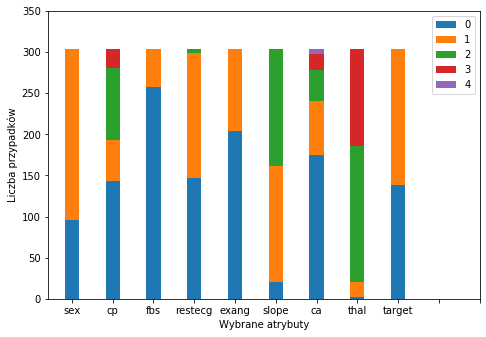

In [376]:
zero = []
one = []
two = []
three = [] 
four = []
chosen_columns = ['sex', 'cp','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for column in chosen_columns:
    count = Counter(org_data[column])
    zero.append(count[0])
    one.append(count[1])
    two.append(count[2])
    three.append(count[3])
    four.append(count[4])

zero = np.array(zero)
one = np.array(one)
two = np.array(two)
three = np.array(three)
four = np.array(four)

N = len(chosen_columns)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure(frameon=True) #figsize=(16,16)
ax = fig.add_axes([0,0,1,1])

a = ax.bar(ind, zero, width)
ax.bar(ind, one, width, bottom=zero)
ax.bar(ind, two, width, bottom=zero+one)
ax.bar(ind, three, width, bottom=zero+one+two)
ax.bar(ind, four, width, bottom=zero+one+two+three)

ax.set_ylabel('Liczba przypadków')
ax.set_xlabel('Wybrane atrybuty')
# ax.set_title('Rozłożenie wartości wybranych atrybutów')
ax.set_xticklabels(chosen_columns)
ax.set_yticks(np.arange(0, 351, 50))
ax.set_xticks(np.arange(0, 11, 1))
ax.legend(labels=['0', '1', '2', '3', '4'])
fig.savefig("./figures/distribution_rest.pdf", bbox_inches='tight')
plt.show()

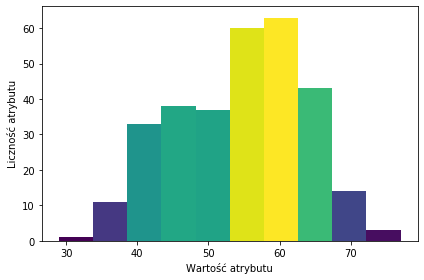

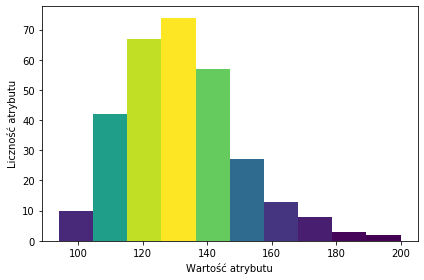

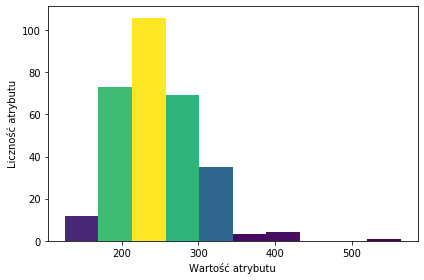

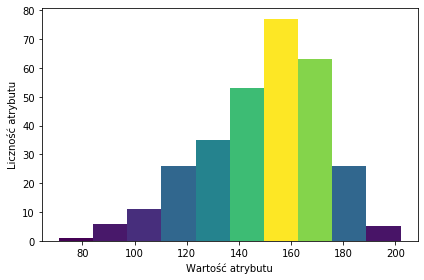

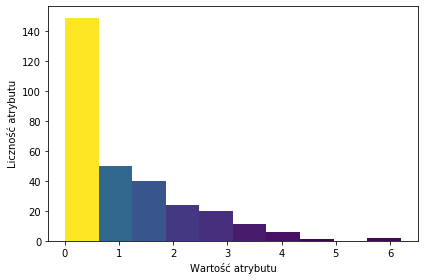

In [334]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

for i, column in enumerate(org_data.columns[:-1]):
    if column not in chosen_columns:
        fig, axs = plt.subplots(1, 1, tight_layout=True)
        N, bins, patches = axs.hist(org_data[column], bins=10) # ,  weights=np.ones(len(org_data[column])) / len(org_data[column])
        fracs = N / N.max()
        norm = colors.Normalize(fracs.min(), fracs.max())
        
        for thisfrac, thispatch in zip(fracs, patches):
            plt.ylabel('Liczność atrybutu')
            plt.xlabel('Wartość atrybutu')
#             plt.title('Rozkład wartości atrybutu \'{}\''.format(column))
            fig.savefig("./figures/distribution_{}.pdf".format(column), bbox_inches='tight')
#             plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
            color = plt.cm.viridis(norm(thisfrac))
            thispatch.set_facecolor(color)

# Wartości średnie, maksymalne, minimalne i odchylenie od średniej wartości atrybutów

In [384]:
mean_df = pd.DataFrame(X.mean())
std_df = pd.DataFrame(X.std())
min_df = pd.DataFrame(X.min())
max_df = pd.DataFrame(X.max())

mean_std_df = mean_df.merge(std_df, left_index=True, right_index=True)
mean_std_df["std/mean"] = mean_std_df['0_y']/mean_std_df["0_x"]
mean_std_min_df = mean_std_df.merge(min_df, left_index=True, right_index=True)
mean_std_min_max_df = mean_std_min_df.merge(max_df, left_index=True, right_index=True)

mean_std_min_max_df.columns = ['mean', "std", "std/mean", 'min', 'max']
pd.DataFrame.round(mean_std_min_max_df,decimals=4).to_csv("./data_desc.csv")
mean_std_min_max_df

,mean,std,std/mean,min,max
age,54.366337,9.082101,0.167054,29.0,77.0
sex,0.683168,0.466011,0.682132,0.0,1.0
cp,0.966997,1.032052,1.067276,0.0,3.0
trestbps,131.623762,17.538143,0.133245,94.0,200.0
chol,246.264026,51.830751,0.210468,126.0,564.0
fbs,0.148515,0.356198,2.398399,0.0,1.0
restecg,0.528053,0.525860,0.995847,0.0,2.0
thalach,149.646865,22.905161,0.153061,71.0,202.0
exang,0.326733,0.469794,1.437856,0.0,1.0
oldpeak,1.039604,1.161075,1.116844,0.0,6.2


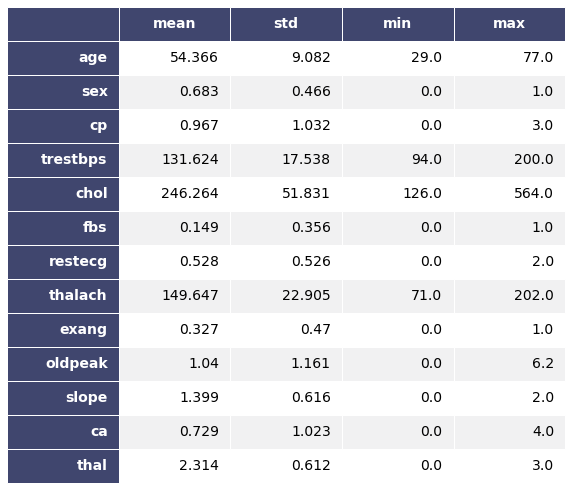

In [385]:
mean_std_min_max_df = mean_std_min_max_df.round(3)[['mean', 'std', 'min', 'max']]
mean_std_min_max_df = mean_std_min_max_df.reset_index().rename(columns={"index": ""})
mean_std_min_max_df[""]=org_data.columns[:-1]
render_mpl_table(mean_std_min_max_df, header_columns=1, col_width=2.0)
plt.savefig("./figures/mean_std_min_max.pdf", bbox_inches='tight')

# Wizualizacji przykładów w przestrzeni 2D oraz 3D 

:  0.3307476084617941


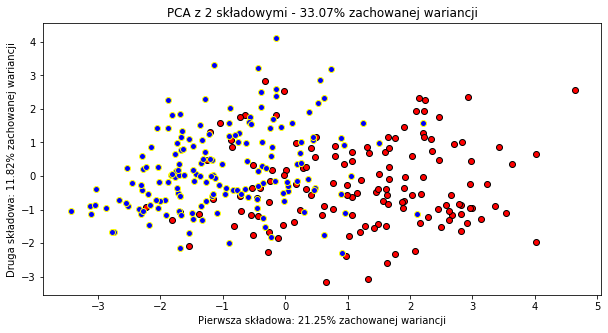

In [5]:
%matplotlib inline  
from sklearn.decomposition import PCA
sca = StandardScaler()
X_std = sca.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.scatter(X_pca[y==0][:,0], X_pca[y==0][:,1], color='red', edgecolor='black')
plt.scatter(X_pca[y==1][:,0], X_pca[y==1][:,1], color='blue', edgecolor='yellow')

plt.xlabel("Pierwsza składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Druga składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title("PCA z 2 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))


plt.savefig("./figures/PCA_2D.pdf")
print(": ", sum(pca.explained_variance_ratio_))

In [6]:
from matplotlib import interactive
import mpl_toolkits.mplot3d as plt3d
%matplotlib qt  
# wx, gtk, osx, tk, empty uses default

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_std)

fig = plt.figure()
fig.set_size_inches(10, 5)
ax = plt.axes(projection='3d')
y_5k = y
ax.scatter3D(X_pca[y_5k==0][:,0], X_pca[y_5k==0][:,1], X_pca[y_5k==0][:,2], color='red', edgecolor='black')
ax.scatter3D(X_pca[y_5k==1][:,0], X_pca[y_5k==1][:,1], X_pca[y_5k==1][:,2], color='blue', edgecolor='yellow')

ax.set_xlabel("\nPierwsza składowa:\n{0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel("\nDruga składowa:\n{0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
ax.set_zlabel("\nTrzecia składowa:\n{0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[2]*100, 2)))
plt.title("PCA z 3 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))

# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

# ax.view_init(30, 30)
# plt.savefig("./figures/PCA_3D_2.pdf")
print(": ", sum(pca.explained_variance_ratio_))

:  0.4248117853438838


# Przekształcenie danych

In [5]:
from sklearn.preprocessing import OneHotEncoder
columns_to_one_hot_encode = ['sex','cp','fbs','restecg','exang','slope','thal']
colums_rest = [col for col in org_data.columns if col not in columns_to_one_hot_encode]
test = org_data[columns_to_one_hot_encode]

ohe = OneHotEncoder()
columns_after_ohe = pd.get_dummies(data=test, columns=columns_to_one_hot_encode).columns
ohe_df = pd.DataFrame(ohe.fit_transform(test).toarray(), columns=columns_after_ohe).astype(np.int)
new_data = pd.concat([ohe_df, org_data[colums_rest]], axis=1)
new_data.iloc[:3]

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak,ca,target
0,0,1,0,0,0,1,0,1,1,0,...,1,0,0,63,145,233,150,2.3,0,1
1,0,1,0,0,1,0,1,0,0,1,...,0,1,0,37,130,250,187,3.5,0,1
2,1,0,0,1,0,0,1,0,1,0,...,0,1,0,41,130,204,172,1.4,0,1


# Korelacja Pearsona

In [138]:
from scipy.stats import pearsonr
import itertools as it
for (col1, col2) in list(it.combinations(org_data.columns, 2)):
    print("{0}-{1}: {2}".format(col1, col2, pearsonr(org_data[col1], org_data[col2])[0]))

age-sex: -0.09844660247479392
age-cp: -0.06865301584014488
age-trestbps: 0.27935090656128836
age-chol: 0.21367795655956187
age-fbs: 0.12130764809337474
age-restecg: -0.11621089815852972
age-thalach: -0.3985219381210675
age-exang: 0.09680082645526773
age-oldpeak: 0.21001256735867363
age-slope: -0.16881423801209555
age-ca: 0.27632624401913913
age-thal: 0.06800137705465181
age-target: -0.22543871587483727
sex-cp: -0.049352875346989344
sex-trestbps: -0.05676882396964335
sex-chol: -0.197912174141107
sex-fbs: 0.045031789193560386
sex-restecg: -0.058196267703754634
sex-thalach: -0.04401990776957477
sex-exang: 0.1416638109915057
sex-oldpeak: 0.09609287706773896
sex-slope: -0.030710567303172624
sex-ca: 0.11826141332036018
sex-thal: 0.21004109563720735
sex-target: -0.28093657550176704
cp-trestbps: 0.04760776064464852
cp-chol: -0.0769043910332077
cp-fbs: 0.09444403499533144
cp-restecg: 0.04442059251016379
cp-thalach: 0.29576212458791057
cp-exang: -0.3942802684950219
cp-oldpeak: -0.149230158097080

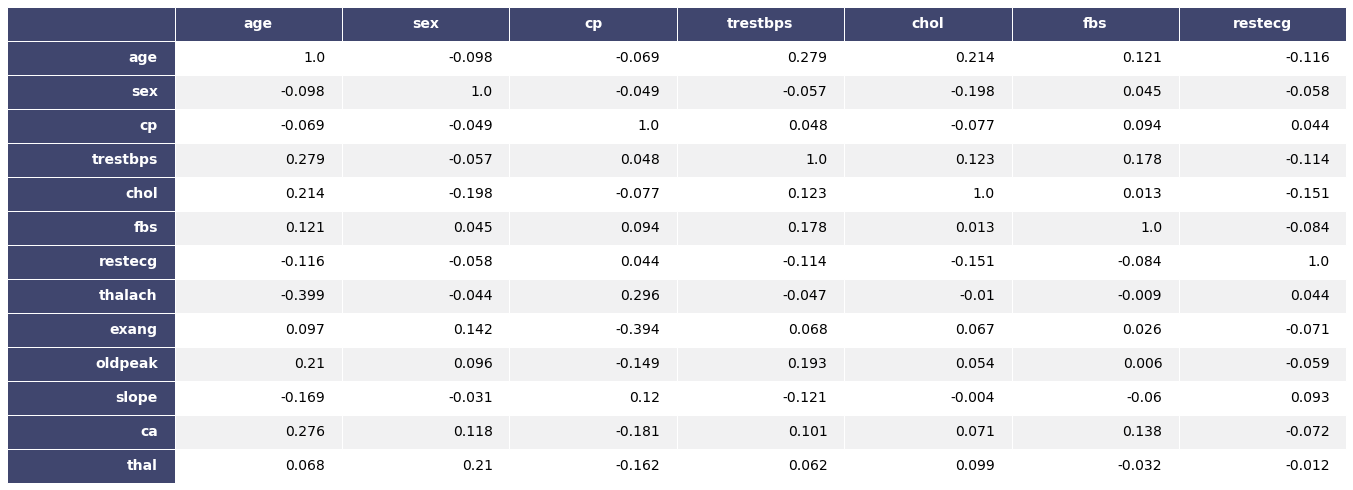

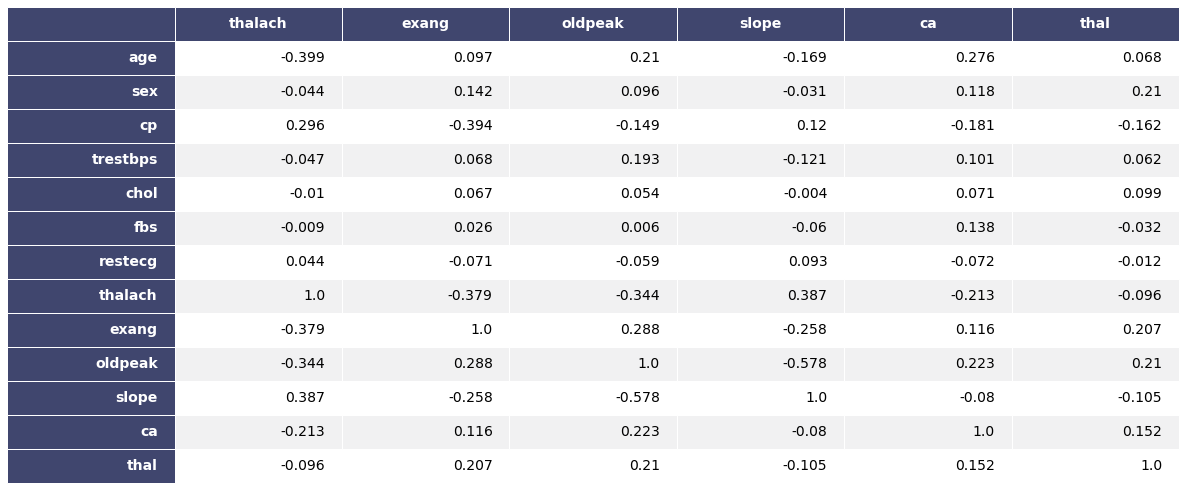

In [25]:
org_data = pd.read_csv("./data/heart.csv")
X = org_data.iloc[:, :-1]
y = org_data.iloc[:, -1]

df = pd.DataFrame(org_data,columns=org_data.columns[:-1])

corrMatrix = df.corr()
corrMatrix = corrMatrix.round(3)[org_data.columns[:-1]]
corrMatrix = corrMatrix.reset_index().rename(columns={"index": ""})
corrMatrix[""]=org_data.columns[:-1]

part1 = ['', 'age', 'sex','cp','trestbps','chol','fbs','restecg']
part2 = ['', 'thalach','exang','oldpeak','slope','ca','thal']
render_mpl_table(corrMatrix.round(3)[part1], header_columns=1)
plt.savefig("./figures/pearson1.pdf", bbox_inches='tight')
render_mpl_table(corrMatrix.round(3)[part2], header_columns=1)
plt.savefig("./figures/pearson2.pdf", bbox_inches='tight')

# Feature importances

Feature ranking:
1. feature cp (0.133760)
2. feature ca (0.114446)
3. feature thal (0.113518)
4. feature oldpeak (0.112721)
5. feature thalach (0.108660)
6. feature age (0.086520)
7. feature chol (0.079135)
8. feature trestbps (0.072925)
9. feature exang (0.061369)
10. feature slope (0.052305)
11. feature sex (0.034459)
12. feature restecg (0.021035)
13. feature fbs (0.009148)


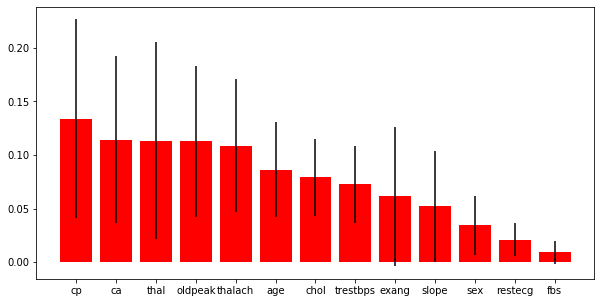

In [6]:
from sklearn.ensemble import RandomForestClassifier
X = org_data.iloc[:, :-1]
y = org_data.iloc[:, -1]
columns = X.columns
# Build a forest and compute the impurity-based feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
x_axis_labels = []
for i, col_index in enumerate(indices):
    x_axis_labels.append(columns[col_index])
    print("%d. feature %s (%f)" % (i + 1, columns[col_index], importances[indices[i]]))

# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(10,5))

# plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), x_axis_labels)
plt.xlim([-1, X.shape[1]])
fig.savefig("./figures/feature_importance_data_RF.pdf", bbox_inches='tight')
plt.show()


Feature ranking:
1. feature ca (0.101601)
2. feature thal_2 (0.099134)
3. feature thalach (0.095175)
4. feature cp_0 (0.090070)
5. feature oldpeak (0.086626)
6. feature age (0.079647)
7. feature chol (0.064188)
8. feature thal_3 (0.060488)
9. feature trestbps (0.057522)
10. feature exang_0 (0.038986)
11. feature exang_1 (0.038756)
12. feature slope_2 (0.028800)
13. feature slope_1 (0.024006)
14. feature cp_2 (0.021858)
15. feature sex_0 (0.019648)
16. feature sex_1 (0.017317)
17. feature restecg_0 (0.014959)
18. feature restecg_1 (0.014202)
19. feature cp_3 (0.011815)
20. feature cp_1 (0.010150)
21. feature fbs_0 (0.007279)
22. feature fbs_1 (0.006911)
23. feature thal_1 (0.004900)
24. feature slope_0 (0.004683)
25. feature thal_0 (0.000759)
26. feature restecg_2 (0.000518)


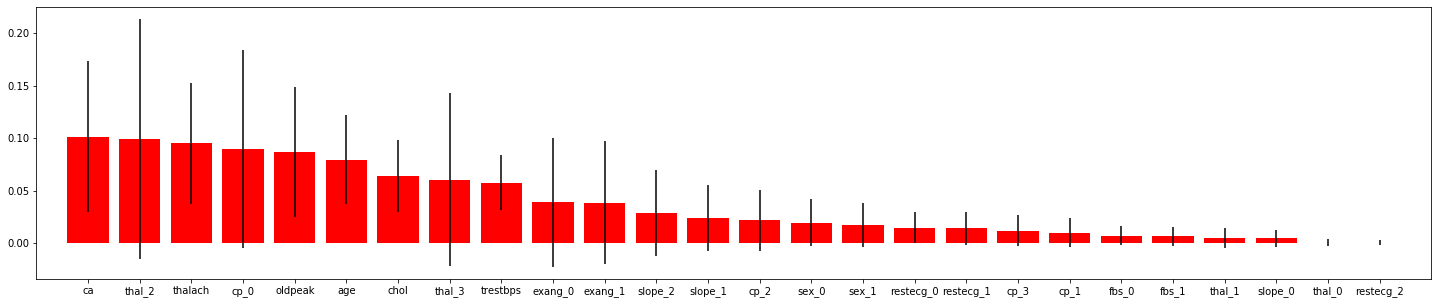

In [7]:
from sklearn.ensemble import RandomForestClassifier
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]
columns = X.columns
# Build a forest and compute the impurity-based feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
x_axis_labels = []
for i, col_index in enumerate(indices):
    x_axis_labels.append(columns[col_index])
    print("%d. feature %s (%f)" % (i + 1, columns[col_index], importances[indices[i]]))

# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(25,5))

# plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), x_axis_labels)
plt.xlim([-1, X.shape[1]])
fig.savefig("./figures/feature_importance_new_data_RF.pdf", bbox_inches='tight')
plt.show()

Feature ranking:
1. feature cp (0.123461)
2. feature ca (0.122243)
3. feature thal (0.105652)
4. feature exang (0.099064)
5. feature oldpeak (0.090297)
6. feature thalach (0.089412)
7. feature age (0.070276)
8. feature slope (0.066147)
9. feature trestbps (0.061347)
10. feature chol (0.060417)
11. feature sex (0.056156)
12. feature restecg (0.035791)
13. feature fbs (0.019738)


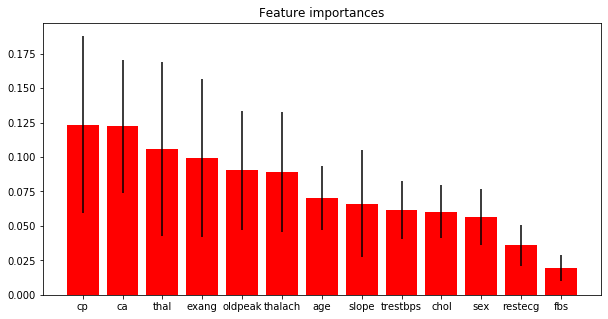

In [184]:
from sklearn.ensemble import ExtraTreesClassifier
X = org_data.iloc[:, :-1]
y = org_data.iloc[:, -1]
columns = X.columns
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
x_axis_labels = []
for i, col_index in enumerate(indices):
    x_axis_labels.append(columns[col_index])
    print("%d. feature %s (%f)" % (i + 1, columns[col_index], importances[indices[i]]))

# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(10,5))

# plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), x_axis_labels)
plt.xlim([-1, X.shape[1]])
fig.savefig("./figures/feature_importance_data.pdf", bbox_inches='tight')
plt.show()


Feature ranking:
1. feature cp_0 (0.101670)
2. feature thal_2 (0.096514)
3. feature ca (0.091342)
4. feature thal_3 (0.075833)
5. feature thalach (0.063428)
6. feature oldpeak (0.060536)
7. feature age (0.057187)
8. feature chol (0.052262)
9. feature exang_1 (0.051238)
10. feature trestbps (0.050103)
11. feature exang_0 (0.045115)
12. feature slope_2 (0.037682)
13. feature slope_1 (0.033563)
14. feature cp_2 (0.024760)
15. feature sex_0 (0.022801)
16. feature restecg_1 (0.022037)
17. feature restecg_0 (0.021721)
18. feature sex_1 (0.021414)
19. feature cp_3 (0.015590)
20. feature cp_1 (0.013633)
21. feature fbs_1 (0.012804)
22. feature fbs_0 (0.011991)
23. feature thal_1 (0.008371)
24. feature slope_0 (0.006695)
25. feature restecg_2 (0.000868)
26. feature thal_0 (0.000840)


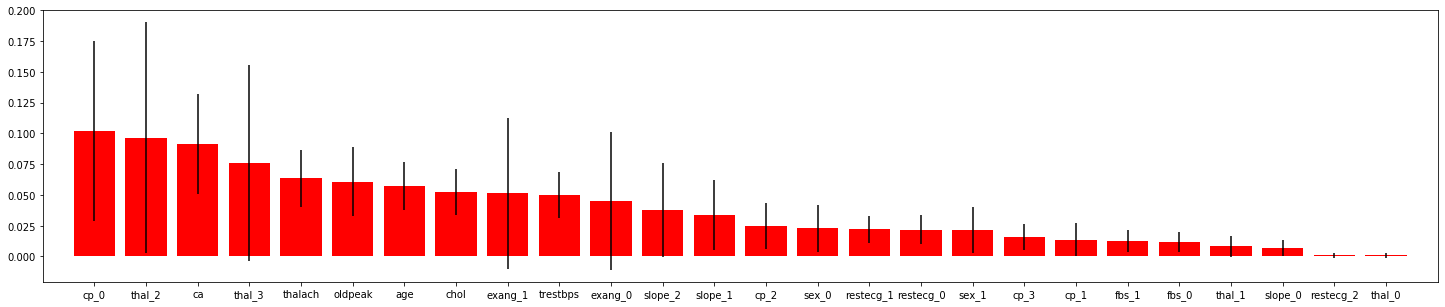

In [188]:
from sklearn.ensemble import ExtraTreesClassifier
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]
columns = X.columns
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
x_axis_labels = []
for i, col_index in enumerate(indices):
    x_axis_labels.append(columns[col_index])
    print("%d. feature %s (%f)" % (i + 1, columns[col_index], importances[indices[i]]))

# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(25,5))

# plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), x_axis_labels)
plt.xlim([-1, X.shape[1]])
fig.savefig("./figures/feature_importance_new_data.pdf", bbox_inches='tight')
plt.show()

# Drzewa Decyzyjne

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'clf__criterion': 'gini', 'clf__max_depth': 3}

Grid scores on development set:

test BEST:  0.819672131147541


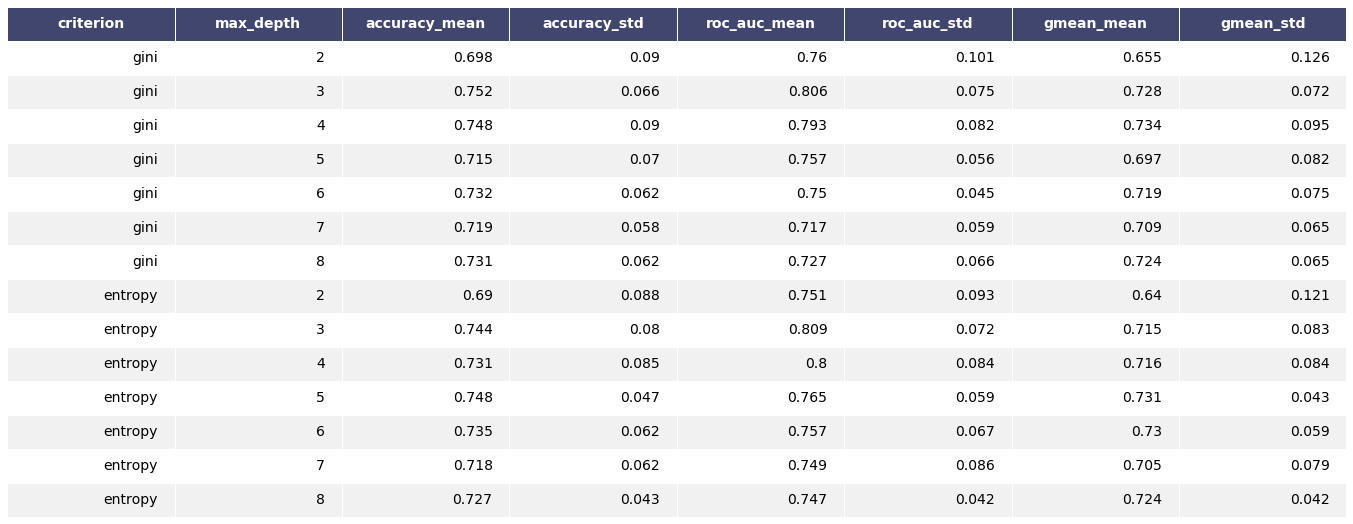

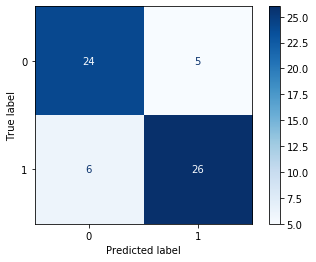

0.9509639739990234


In [50]:
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import time
import pickle

from sklearn.tree import DecisionTreeClassifier

# import warnings
# warnings.filterwarnings('ignore')


classifier_name = 'DTC'
start = time.time()
pipe = Pipeline(steps=[('clf', DecisionTreeClassifier())]) #('scaler', StandardScaler()),
criterion_values = ['gini', 'entropy']
max_depth_values = [2,3,4,5,6,7,8]
tuned_parameters = {'clf__criterion': criterion_values,
                   'clf__max_depth': max_depth_values}

refit = 'accuracy'

scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          'gmean': make_scorer(gmean)}

data_sets = [org_data,]
data_names = ['data']
for data_name, data in zip(data_names, data_sets):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    result_list_of_dicts= []
    print("# Tuning hyper-parameters for %s" % 'accuracy')
    print()

    clf = GridSearchCV(estimator=pipe, 
                       param_grid=tuned_parameters, 
                       scoring=scoring,
                       refit=refit,
                       cv=StratifiedKFold(n_splits=10, shuffle=True),
                      return_train_score=True,
                      n_jobs=6)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(clf.cv_results_['params']):
        acc_mean = clf.cv_results_['mean_test_{0}'.format('accuracy')][i]
        roc_auc_mean = clf.cv_results_['mean_test_{0}'.format('roc_auc')][i]
        gmean_mean = clf.cv_results_['mean_test_{0}'.format('gmean')][i]

        acc_std = clf.cv_results_['std_test_{0}'.format('accuracy')][i]
        roc_auc_std = clf.cv_results_['std_test_{0}'.format('roc_auc')][i]
        gmean_std = clf.cv_results_['std_test_{0}'.format('gmean')][i]

#         print(params)
#         print('accuracy: %0.3f (+/-%0.03f)' %(acc_mean, acc_std))
#         print('roc_auc: %0.3f (+/-%0.03f)' %(roc_auc_mean, roc_auc_std))
#         print('gmean: %0.3f (+/-%0.03f)' %(gmean_mean, gmean_std))
#         print()

        result_list_of_dicts.append({'criterion':params['clf__criterion'],
                                     'max_depth':params['clf__max_depth'],
                                    'accuracy_mean':acc_mean,
                                    'accuracy_std':acc_std,
                                    'roc_auc_mean':roc_auc_mean,
                                    'roc_auc_std':roc_auc_std,
                                    'gmean_mean':gmean_mean,
                                    'gmean_std':gmean_std})

#     print()
#     pickle.dump(clf, open( "./saved_models/{0}_{1}.pkl".format(classifier_name, data_name), "wb" ) )
    result = pd.DataFrame(result_list_of_dicts).round(3)
    render_mpl_table(result)
#     plt.savefig("./figures/results_{0}_{1}.pdf".format(classifier_name, data_name), bbox_inches='tight')
    
    # best estimator
    best_est = clf.best_estimator_
    best_est.fit(X_train, y_train)
    y_pred = best_est.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("test BEST: ", score)
    
    disp = plot_confusion_matrix(best_est, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
#     plt.savefig('./figures/DTC_{0}_CM.pdf'.format(data_name))
    plt.show()

    # create heatmap
    values = result['accuracy_mean'].to_numpy().reshape(len(criterion_values), len(max_depth_values)).T
    x = result.iloc[:,0].unique()
    y = result.iloc[:,1].unique()
#     create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}.pdf'.format(classifier_name, data_name), rotate=True)


print(time.time()-start)


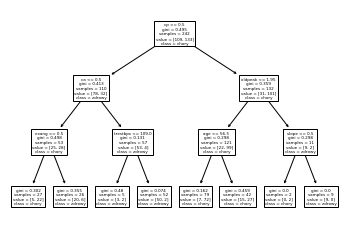

In [53]:
from sklearn.tree import plot_tree
import pickle
dtc = clf.best_estimator_['clf']
plot_tree(dtc, feature_names=org_data.columns, class_names=['zdrowy', 'chory'])
plt.savefig('./figures/dtc_visualization.pdf')

In [52]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [481]:
# X = data.iloc[:, :-1]
# y = data.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


# grid = pickle.load(open('./saved_models/DTC_data.pkl', 'rb'))
# best = grid.best_estimator_
# disp = plot_confusion_matrix(best, X_test, y_test,
#                                  display_labels=[0, 1],
#                                  cmap=plt.cm.Blues, 
#                                  values_format='d')
# # plt.savefig('./figures/DTC_data_CM.pdf')
# plt.show()

# X = new_data.iloc[:, :-1]
# y = new_data.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# grid = pickle.load(open('./saved_models/DTC_data_ohe.pkl', 'rb'))
# best = grid.best_estimator_
# disp = plot_confusion_matrix(best, X_test, y_test,
#                                  display_labels=[0, 1],
#                                  cmap=plt.cm.Blues, 
#                                  values_format='d')
# # plt.savefig('./figures/DTC_data_ohe_CM.pdf')
# plt.show()

ValueError: operands could not be broadcast together with shapes (61,13) (26,) (61,13) 

# Maszyny wektorów wspierających - SVC

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'clf__C': 1000, 'clf__kernel': 'linear'}

Grid scores on development set:

test BEST:  0.8852459016393442


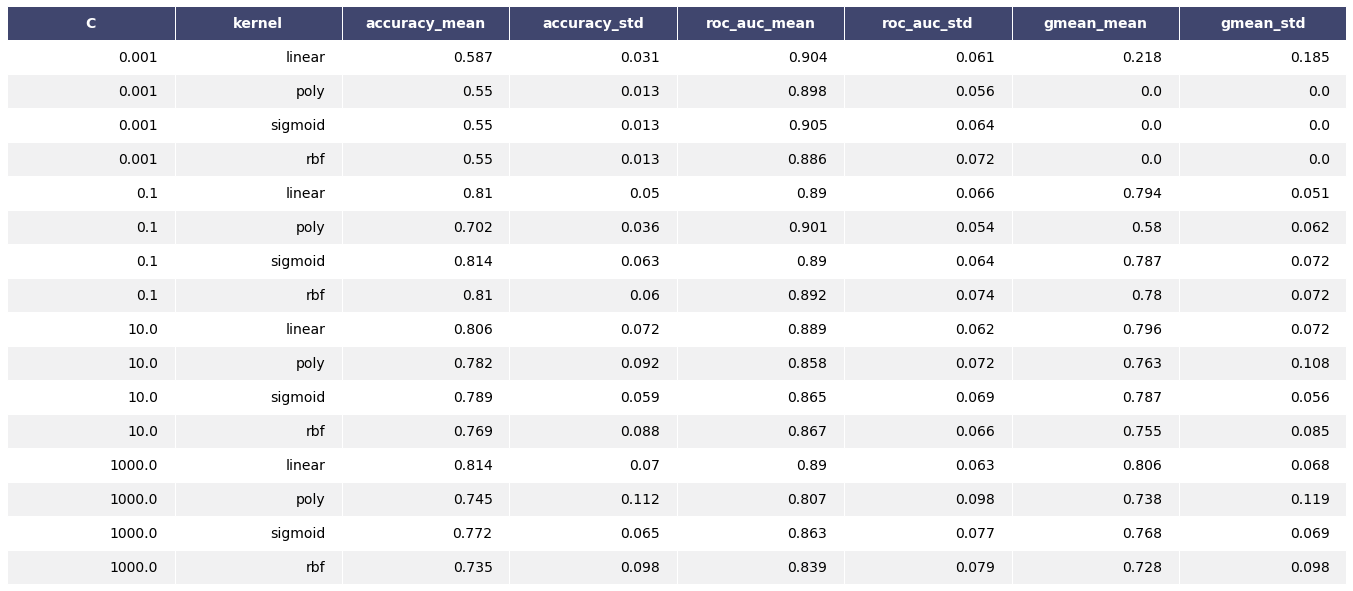

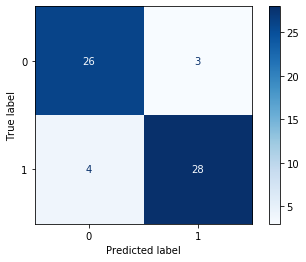

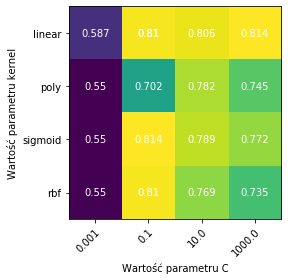

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'clf__C': 10, 'clf__kernel': 'linear'}

Grid scores on development set:

test BEST:  0.8524590163934426


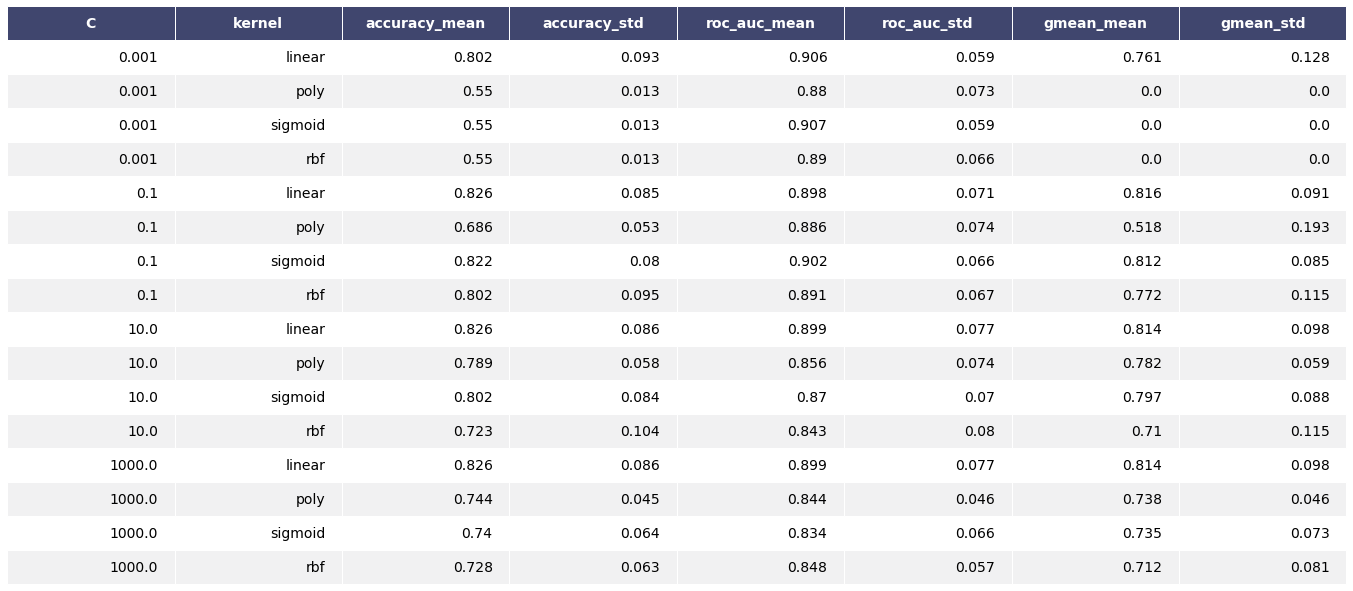

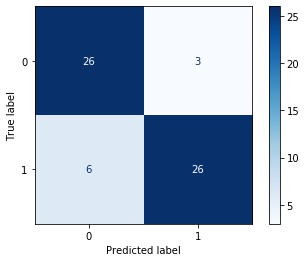

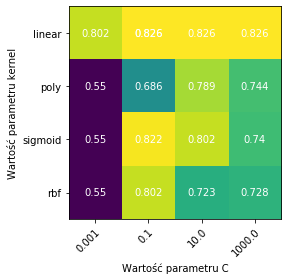

31.511132955551147


In [507]:
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import time
import pickle

from  sklearn.svm import SVC
# import warnings
# warnings.filterwarnings('ignore')


classifier_name = 'SVC'
start = time.time()
pipe = Pipeline(steps=[('scaler', StandardScaler()),('clf', SVC())])
C_values = [0.001, 0.1, 10, 1000]
kernel_values = ['linear', 'poly', 'sigmoid', 'rbf']
tuned_parameters = {'clf__C': C_values,
                   'clf__kernel': kernel_values}

refit = 'accuracy'

scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          'gmean': make_scorer(gmean)}

data_sets = [ org_data,  new_data]
data_names = ['data', 'data_ohe']
for data_name, data in zip(data_names, data_sets):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    result_list_of_dicts= []
    print("# Tuning hyper-parameters for %s" % 'accuracy')
    print()

    clf = GridSearchCV(estimator=pipe, 
                       param_grid=tuned_parameters, 
                       scoring=scoring,
                       refit=refit,
                       cv=StratifiedKFold(n_splits=10, shuffle=True),
                      return_train_score=True,
                      n_jobs=6)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(clf.cv_results_['params']):
        acc_mean = clf.cv_results_['mean_test_{0}'.format('accuracy')][i]
        roc_auc_mean = clf.cv_results_['mean_test_{0}'.format('roc_auc')][i]
        gmean_mean = clf.cv_results_['mean_test_{0}'.format('gmean')][i]

        acc_std = clf.cv_results_['std_test_{0}'.format('accuracy')][i]
        roc_auc_std = clf.cv_results_['std_test_{0}'.format('roc_auc')][i]
        gmean_std = clf.cv_results_['std_test_{0}'.format('gmean')][i]

#         print(params)
#         print('accuracy: %0.3f (+/-%0.03f)' %(acc_mean, acc_std))
#         print('roc_auc: %0.3f (+/-%0.03f)' %(roc_auc_mean, roc_auc_std))
#         print('gmean: %0.3f (+/-%0.03f)' %(gmean_mean, gmean_std))
#         print()
        result_list_of_dicts.append({'C':params['clf__C'],
                                     'kernel':params['clf__kernel'],
                                    'accuracy_mean':acc_mean,
                                    'accuracy_std':acc_std,
                                    'roc_auc_mean':roc_auc_mean,
                                    'roc_auc_std':roc_auc_std,
                                    'gmean_mean':gmean_mean,
                                    'gmean_std':gmean_std})

#     print()
    pickle.dump(clf, open( "./saved_models/{0}_{1}.pkl".format(classifier_name, data_name), "wb" ) )
    result = pd.DataFrame(result_list_of_dicts).round(3)
    render_mpl_table(result)
    plt.savefig("./figures/results_{0}_{1}.pdf".format(classifier_name, data_name), bbox_inches='tight')
    
    # best estimator
    best_est = clf.best_estimator_
    best_est.fit(X_train, y_train)
    y_pred = best_est.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("test BEST: ", score)
    
    disp = plot_confusion_matrix(best_est, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
    plt.savefig('./figures/SVC_{0}_CM.pdf'.format(data_name))
    plt.show()
    
    # create heatmap
    values = result['accuracy_mean'].to_numpy().reshape(len(C_values), len(kernel_values)).T
    x = result.iloc[:,0].unique()
    y = result.iloc[:,1].unique()
    create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}.pdf'.format(classifier_name, data_name))

print(time.time()-start)


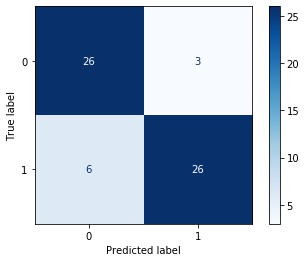

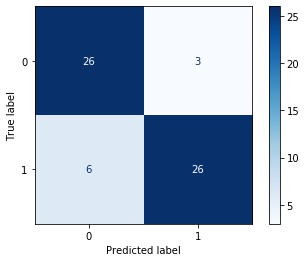

In [489]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
grid = pickle.load(open('./saved_models/SVC_data.pkl', 'rb'))
best = grid.best_estimator_
disp = plot_confusion_matrix(best, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
# plt.savefig('./figures/SVC_data_CM.pdf')
plt.show()

X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
grid = pickle.load(open('./saved_models/SVC_data_ohe.pkl', 'rb'))
best = grid.best_estimator_
disp = plot_confusion_matrix(best, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
# plt.savefig('./figures/SVC_data_ohe_CM.pdf')
plt.show()

# Sieci neuronowe - MLPClassifier

# Tuning hyper-parameters for accuracy



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters set found on development set:

{'clf__activation': 'tanh', 'clf__hidden_layer_sizes': (20, 10), 'clf__solver': 'adam'}

Grid scores on development set:



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test BEST:  0.8524590163934426


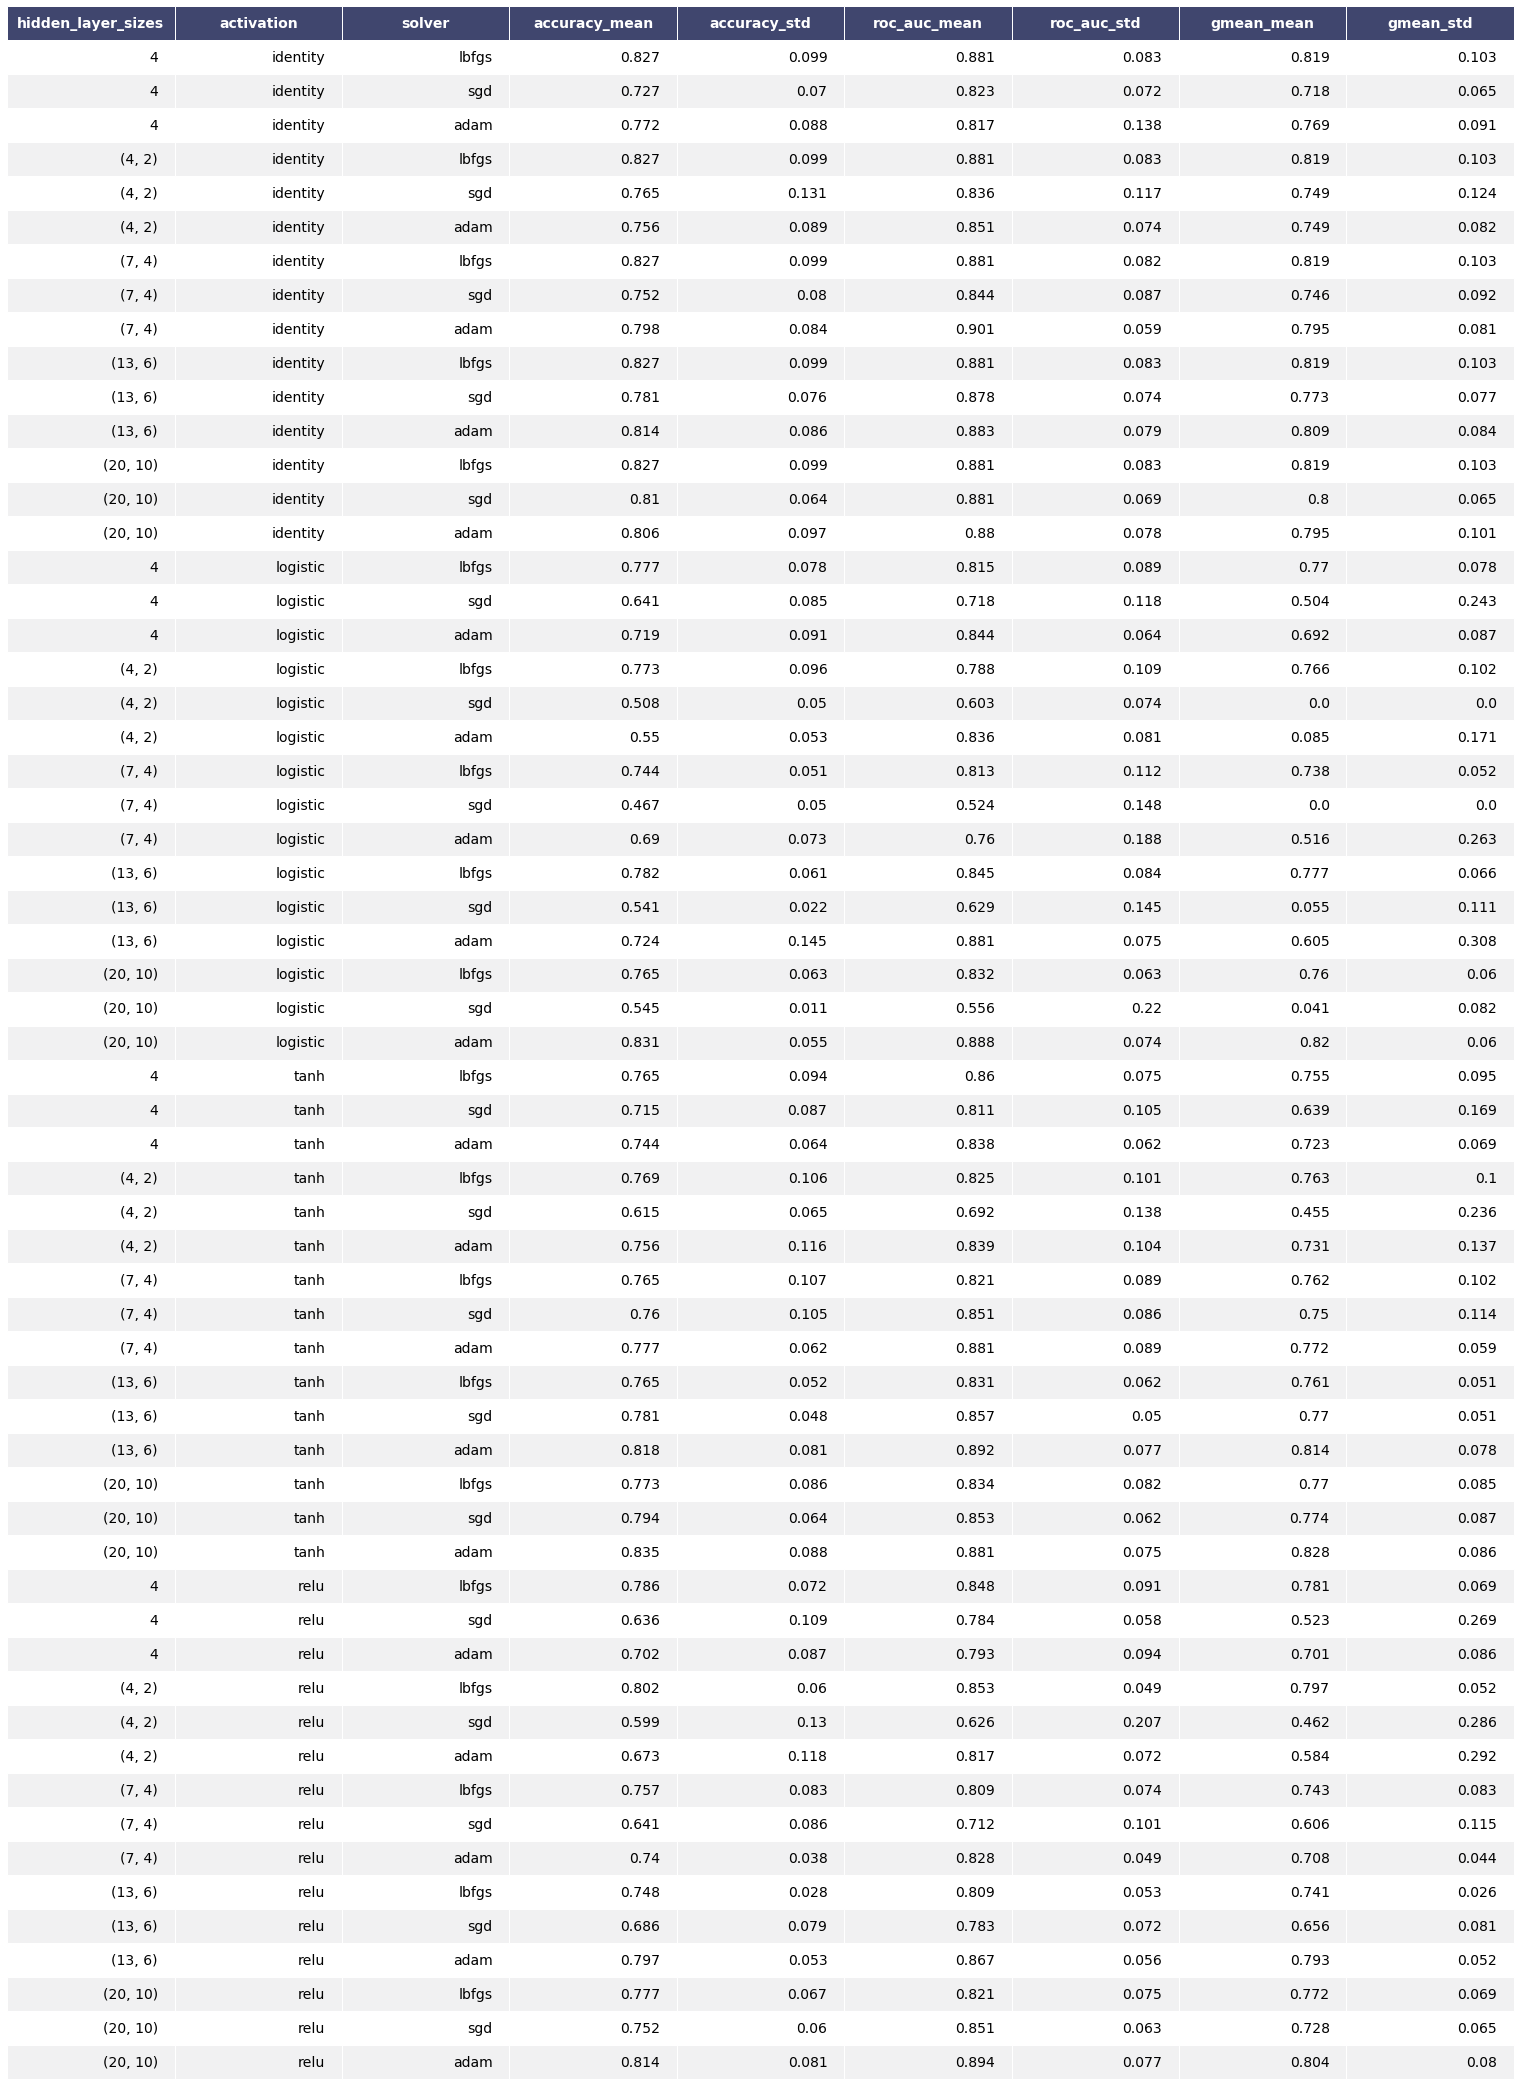

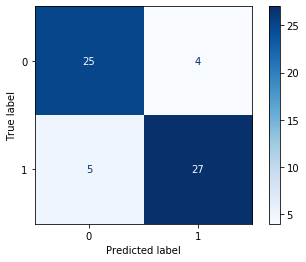

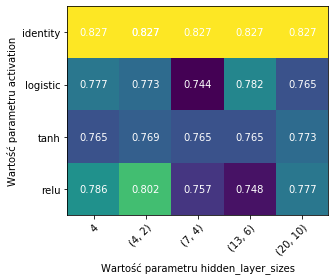

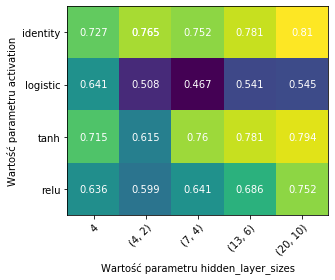

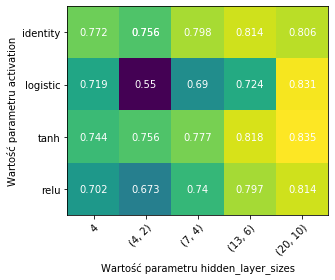

# Tuning hyper-parameters for accuracy



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters set found on development set:

{'clf__activation': 'tanh', 'clf__hidden_layer_sizes': (7, 4), 'clf__solver': 'adam'}

Grid scores on development set:



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


test BEST:  0.8688524590163934


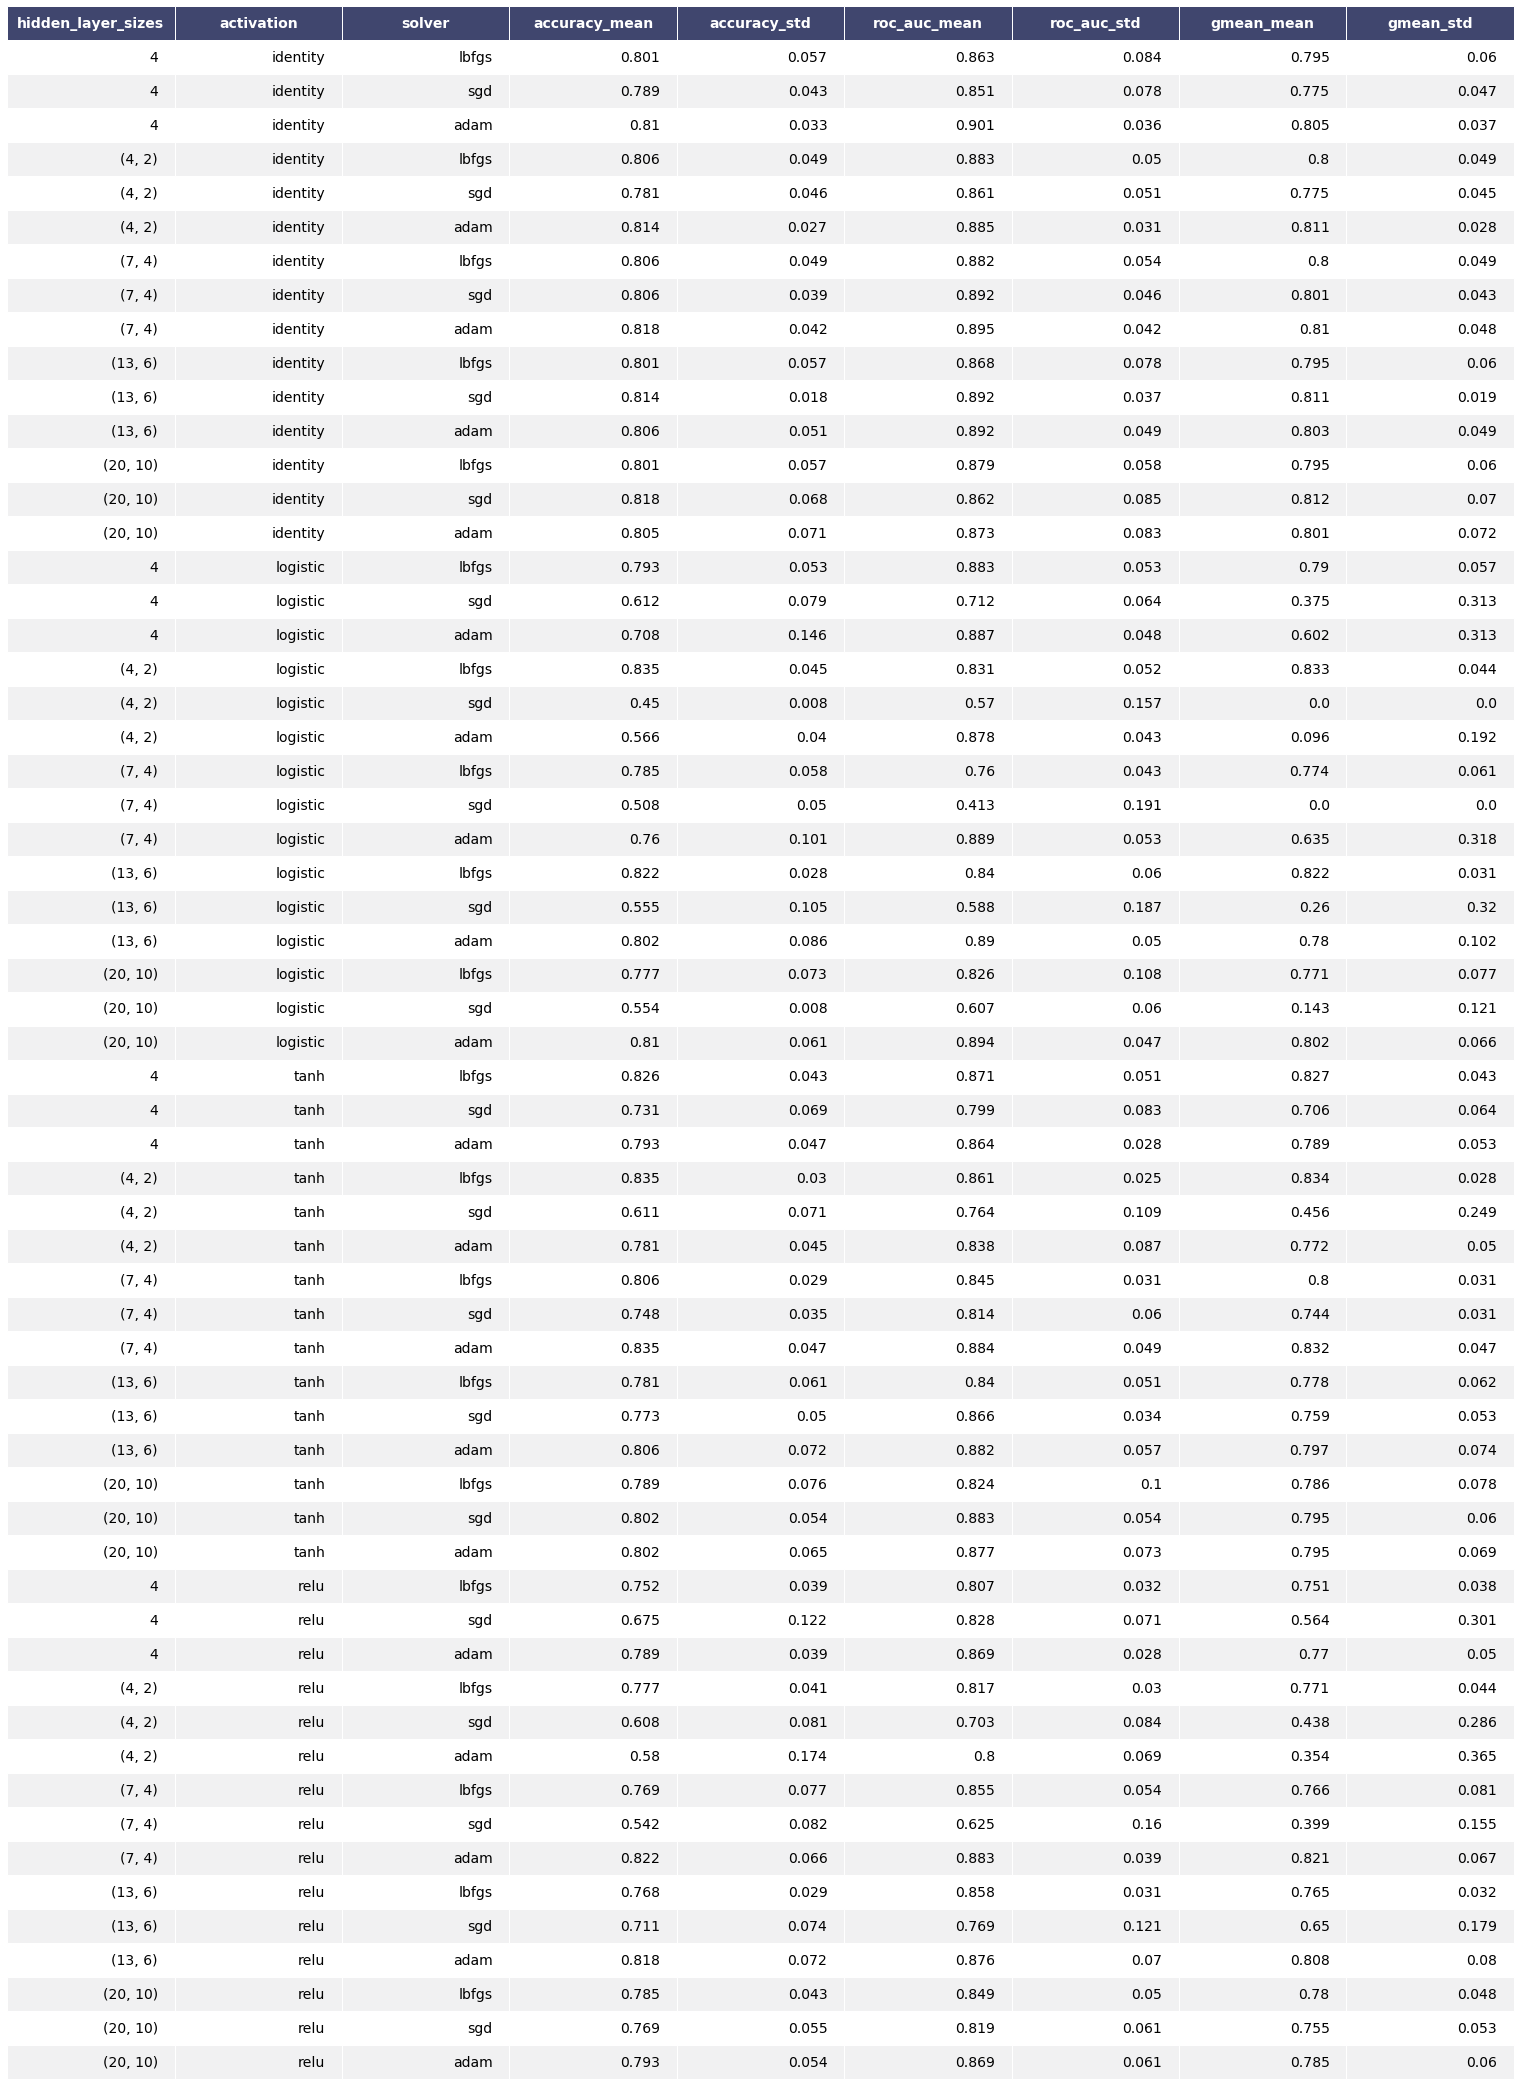

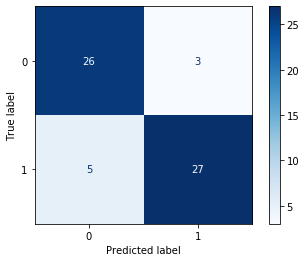

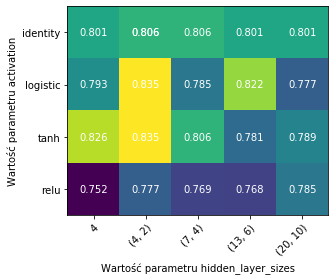

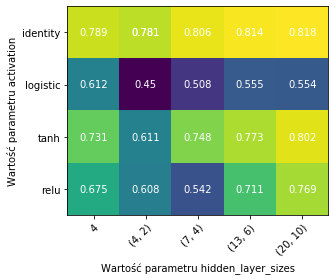

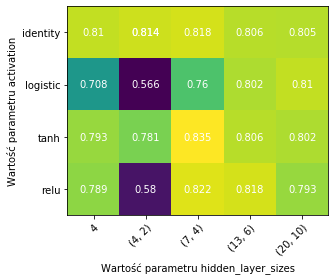

19.522589445114136


In [508]:
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import time
import pickle

from sklearn.neural_network import MLPClassifier
# import warnings
# warnings.filterwarnings('ignore')


clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), random_state=1, 
                    max_iter=10000, n_iter_no_change=1000)
start = time.time()
classifier_name = 'MLPClassifier'
pipe = Pipeline(steps=[('scaler', StandardScaler()),('clf', MLPClassifier())])
hidden_layer_sizes_values = [(4),(4, 2),
                             (7, 4),
                              (13, 6), (20,10)]
activation_values = ['identity', 'logistic', 'tanh', 'relu']
solver_values = ['lbfgs', 'sgd', 'adam']
tuned_parameters = {'clf__hidden_layer_sizes': hidden_layer_sizes_values,
                   'clf__activation': activation_values,
                   'clf__solver': solver_values}

refit = 'accuracy'

scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          'gmean': make_scorer(gmean)}

data_sets = [ org_data,  new_data]
data_names = ['data', 'data_ohe']
for data_name, data in zip(data_names, data_sets):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    result_list_of_dicts= []
    print("# Tuning hyper-parameters for %s" % 'accuracy')
    print()

    clf = GridSearchCV(estimator=pipe, 
                       param_grid=tuned_parameters, 
                       scoring=scoring,
                       refit=refit,
                       cv=StratifiedKFold(n_splits=5, shuffle=True),
                      return_train_score=True,
                      n_jobs=6)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(clf.cv_results_['params']):
        acc_mean = clf.cv_results_['mean_test_{0}'.format('accuracy')][i]
        roc_auc_mean = clf.cv_results_['mean_test_{0}'.format('roc_auc')][i]
        gmean_mean = clf.cv_results_['mean_test_{0}'.format('gmean')][i]

        acc_std = clf.cv_results_['std_test_{0}'.format('accuracy')][i]
        roc_auc_std = clf.cv_results_['std_test_{0}'.format('roc_auc')][i]
        gmean_std = clf.cv_results_['std_test_{0}'.format('gmean')][i]

#         print(params)
#         print('accuracy: %0.3f (+/-%0.03f)' %(acc_mean, acc_std))
#         print('roc_auc: %0.3f (+/-%0.03f)' %(roc_auc_mean, roc_auc_std))
#         print('gmean: %0.3f (+/-%0.03f)' %(gmean_mean, gmean_std))

#         print()
        result_list_of_dicts.append({'hidden_layer_sizes': params['clf__hidden_layer_sizes'],
                                     'activation': params['clf__activation'],
                                     'solver': params['clf__solver'],
                                    'accuracy_mean':acc_mean,
                                    'accuracy_std':acc_std,
                                    'roc_auc_mean':roc_auc_mean,
                                    'roc_auc_std':roc_auc_std,
                                    'gmean_mean':gmean_mean,
                                    'gmean_std':gmean_std})

#     print()

    pickle.dump(clf, open( "./saved_models/{0}_{1}.pkl".format(classifier_name, data_name), "wb" ) )
    result = pd.DataFrame(result_list_of_dicts).round(3)
    render_mpl_table(result)
    plt.savefig("./figures/results_{0}_{1}.pdf".format(classifier_name, data_name), bbox_inches='tight')
    
    # best estimator
    best_est = clf.best_estimator_
    best_est.fit(X_train, y_train)
    y_pred = best_est.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("test BEST: ", score)
    
        
    disp = plot_confusion_matrix(best_est, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
    plt.savefig('./figures/MLP_{0}_CM.pdf'.format(data_name))
    plt.show()
    
    # create heatmap - solver = 'lbfgs'
    values = result.loc[result['solver']=='lbfgs',:]
    values = values['accuracy_mean'].to_numpy().reshape(len(hidden_layer_sizes_values), len(activation_values), order='F').T
    x = result.iloc[:,0].unique()
    y = result.iloc[:,1].unique()
    create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}_lbfgs.pdf'.format(classifier_name, data_name))

    # create heatmap - solver = 'sgd'
    values = result.loc[result['solver']=='sgd',:]
    values = values['accuracy_mean'].to_numpy().reshape(len(hidden_layer_sizes_values), len(activation_values), order='F').T
    x = result.iloc[:,0].unique()
    y = result.iloc[:,1].unique()
    create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}_sgd.pdf'.format(classifier_name, data_name))

    # create heatmap - solver =  'adam'
    values = result.loc[result['solver']=='adam',:]
    values = values['accuracy_mean'].to_numpy().reshape(len(hidden_layer_sizes_values), len(activation_values), order='F').T
    x = result.iloc[:,0].unique()
    y = result.iloc[:,1].unique()
    create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}_adam.pdf'.format(classifier_name, data_name))


print(time.time()-start)


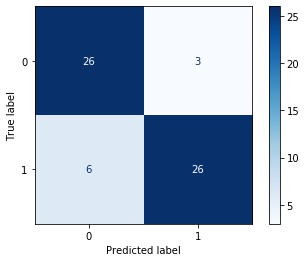

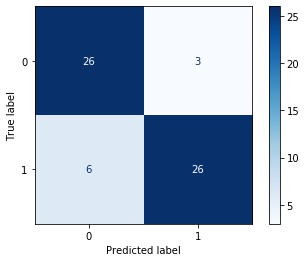

In [437]:
grid = pickle.load(open('./saved_models/MLPClassifier_data.pkl', 'rb'))
best = grid.best_estimator_
disp = plot_confusion_matrix(best, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
plt.savefig('./figures/MLPClassifier_data_CM.pdf')
plt.show()

grid = pickle.load(open('./saved_models/MLPClassifier_data_ohe.pkl', 'rb'))
best = grid.best_estimator_
disp = plot_confusion_matrix(best, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
plt.savefig('./figures/MLP_data_ohe_CM.pdf')
plt.show()

# Regresja Logistyczna

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'clf__C': 0.01, 'clf__solver': 'liblinear'}

Grid scores on development set:

test BEST:  0.8852459016393442


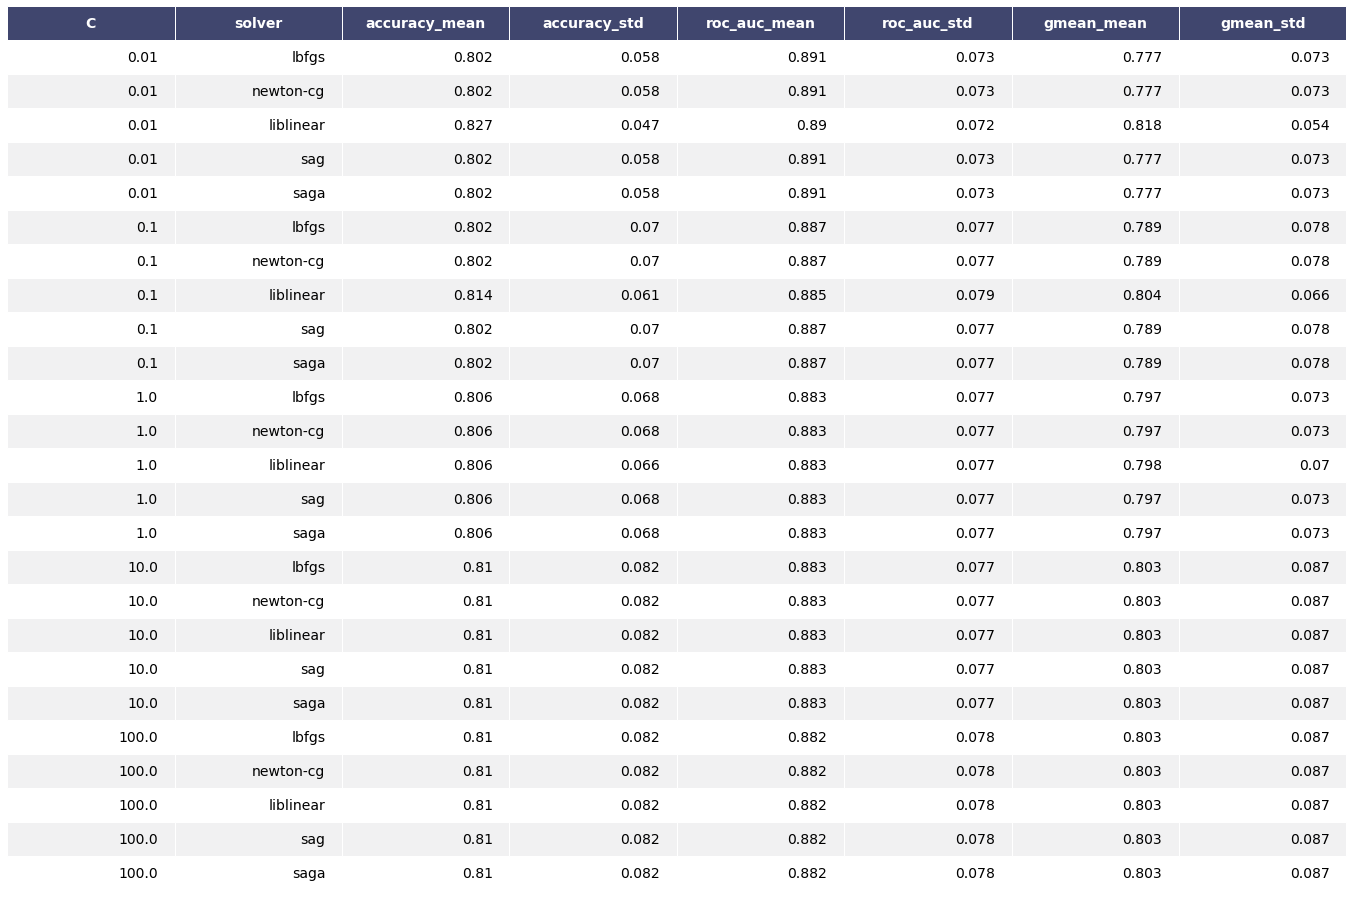

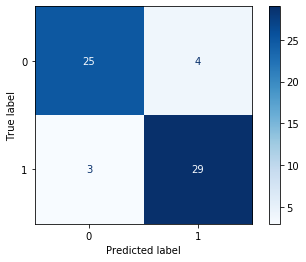

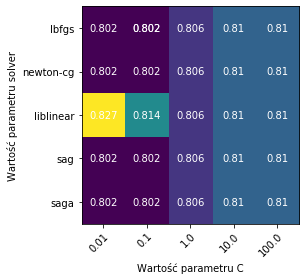

# Tuning hyper-parameters for accuracy



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best parameters set found on development set:

{'clf__C': 100, 'clf__solver': 'saga'}

Grid scores on development set:



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


test BEST:  0.8852459016393442


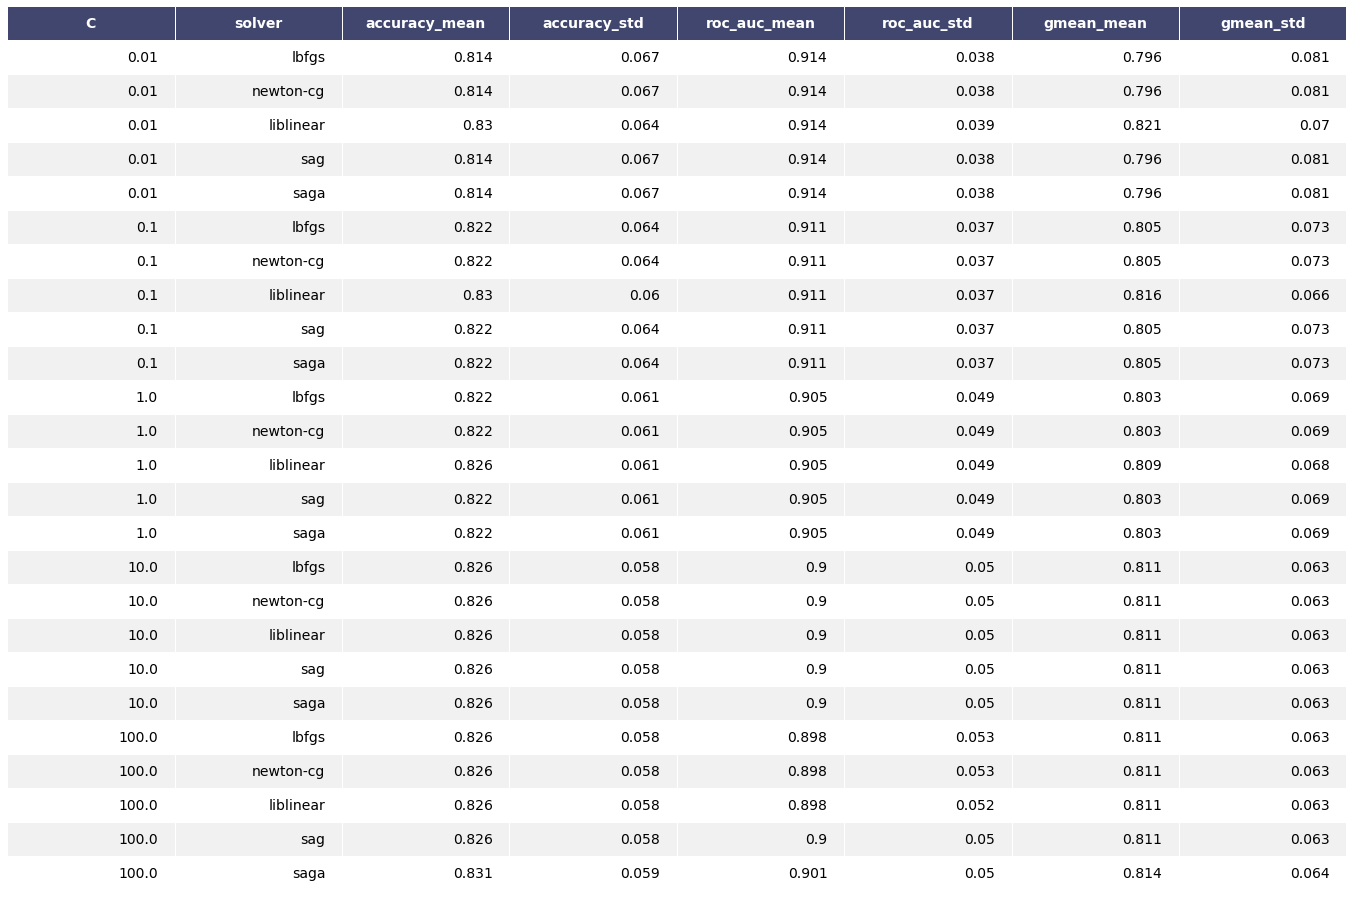

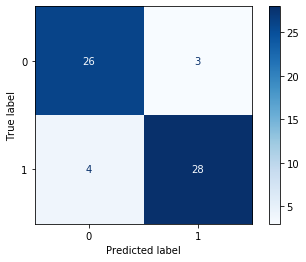

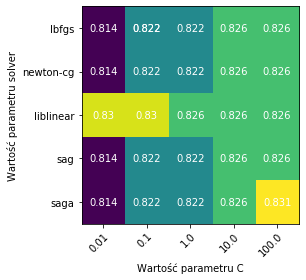

6.821063041687012


In [510]:
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import time
import pickle

from sklearn.linear_model import LogisticRegression
# import warnings
# warnings.filterwarnings('ignore')


classifier_name = 'LR'
start = time.time()
pipe = Pipeline(steps=[('scaler', StandardScaler()),('clf', LogisticRegression())])
C_values = [0.01, 0.1, 1, 10, 100]
solver_values = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
tuned_parameters = {'clf__C': C_values,
                   'clf__solver': solver_values}

refit = 'accuracy'

scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          'gmean': make_scorer(gmean)}

data_sets = [ org_data,  new_data]
data_names = ['data', 'data_ohe']
for data_name, data in zip(data_names, data_sets):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    result_list_of_dicts= []
    print("# Tuning hyper-parameters for %s" % 'accuracy')
    print()

    clf = GridSearchCV(estimator=pipe, 
                       param_grid=tuned_parameters, 
                       scoring=scoring,
                       refit=refit,
                       cv=StratifiedKFold(n_splits=10, shuffle=True),
                      return_train_score=True,
                      n_jobs=6)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(clf.cv_results_['params']):
        acc_mean = clf.cv_results_['mean_test_{0}'.format('accuracy')][i]
        roc_auc_mean = clf.cv_results_['mean_test_{0}'.format('roc_auc')][i]
        gmean_mean = clf.cv_results_['mean_test_{0}'.format('gmean')][i]

        acc_std = clf.cv_results_['std_test_{0}'.format('accuracy')][i]
        roc_auc_std = clf.cv_results_['std_test_{0}'.format('roc_auc')][i]
        gmean_std = clf.cv_results_['std_test_{0}'.format('gmean')][i]

#         print(params)
#         print('accuracy: %0.3f (+/-%0.03f)' %(acc_mean, acc_std))
#         print('roc_auc: %0.3f (+/-%0.03f)' %(roc_auc_mean, roc_auc_std))
#         print('gmean: %0.3f (+/-%0.03f)' %(gmean_mean, gmean_std))
#         print()
        result_list_of_dicts.append({'C':params['clf__C'],
                                     'solver':params['clf__solver'],
                                    'accuracy_mean':acc_mean,
                                    'accuracy_std':acc_std,
                                    'roc_auc_mean':roc_auc_mean,
                                    'roc_auc_std':roc_auc_std,
                                    'gmean_mean':gmean_mean,
                                    'gmean_std':gmean_std})

#     print()
    pickle.dump(clf, open( "./saved_models/{0}_{1}.pkl".format(classifier_name, data_name), "wb" ) )
    result = pd.DataFrame(result_list_of_dicts).round(3)
    render_mpl_table(result)
    plt.savefig("./figures/results_{0}_{1}.pdf".format(classifier_name, data_name), bbox_inches='tight')
    
    
    # best estimator
    best_est = clf.best_estimator_
    best_est.fit(X_train, y_train)
    y_pred = best_est.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("test BEST: ", score)
    
    disp = plot_confusion_matrix(best_est, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
    plt.savefig('./figures/LR_{0}_CM.pdf'.format(data_name))
    plt.show()
    
    
    # create heatmap
    values = result['accuracy_mean'].to_numpy().reshape(len(C_values), len(solver_values)).T
    x = result.iloc[:,0].unique()
    y = result.iloc[:,1].unique()
    create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}.pdf'.format(classifier_name, data_name))

print(time.time()-start)


# VotingClassifier

# Tuning hyper-parameters for accuracy



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters set found on development set:

{'clf__estimators': [('DTC', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')), ('SVC', SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)), ('MLP', MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learn

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


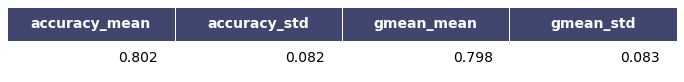

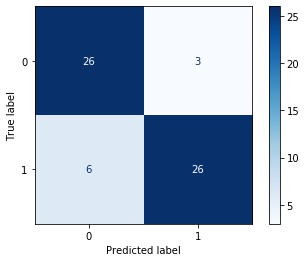

# Tuning hyper-parameters for accuracy



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters set found on development set:

{'clf__estimators': [('DTC', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')), ('SVC', SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)), ('MLP', MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learn

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


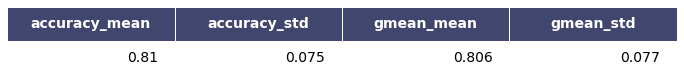

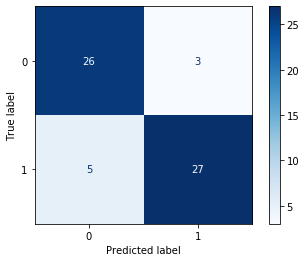

2.6852362155914307


In [512]:
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import time
import pickle

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# import warnings
# warnings.filterwarnings('ignore')


classifier_name = 'VT'
start = time.time()

estimator_values = [('DTC',DecisionTreeClassifier(max_depth=3, criterion='gini')),
                    ('SVC',SVC(kernel='rbf',C=10)),
                    ('MLP',MLPClassifier(activation='tanh', hidden_layer_sizes=(20,10), solver='adam')),
                    ('LR',LogisticRegression())]
pipe = Pipeline(steps=[('scaler', StandardScaler()),('clf', VotingClassifier(estimators=[]))])
tuned_parameters = {'clf__estimators': [estimator_values]}
refit = 'accuracy'

scoring = {'accuracy': 'accuracy',
#            'roc_auc': 'roc_auc',
          'gmean': make_scorer(gmean)}

data_sets = [ org_data,  new_data]
data_names = ['data', 'data_ohe']
for data_name, data in zip(data_names, data_sets):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    result_list_of_dicts= []
    print("# Tuning hyper-parameters for %s" % 'accuracy')
    print()

    clf = GridSearchCV(estimator=pipe, 
                       param_grid=tuned_parameters, 
                       scoring=scoring,
                       refit=refit,
                       cv=StratifiedKFold(n_splits=10, shuffle=True),
                      return_train_score=True,
                      n_jobs=6)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(clf.cv_results_['params']):
        acc_mean = clf.cv_results_['mean_test_{0}'.format('accuracy')][i]
#         roc_auc_mean = clf.cv_results_['mean_test_{0}'.format('roc_auc')][i]
        gmean_mean = clf.cv_results_['mean_test_{0}'.format('gmean')][i]

        acc_std = clf.cv_results_['std_test_{0}'.format('accuracy')][i]
#         roc_auc_std = clf.cv_results_['std_test_{0}'.format('roc_auc')][i]
        gmean_std = clf.cv_results_['std_test_{0}'.format('gmean')][i]

#         print(params)
#         print('accuracy: %0.3f (+/-%0.03f)' %(acc_mean, acc_std))
#         print('roc_auc: %0.3f (+/-%0.03f)' %(roc_auc_mean, roc_auc_std))
#         print('gmean: %0.3f (+/-%0.03f)' %(gmean_mean, gmean_std))
#         print()
        result_list_of_dicts.append({
                                    'accuracy_mean':acc_mean,
                                    'accuracy_std':acc_std,
#                                     'roc_auc_mean':roc_auc_mean,
#                                     'roc_auc_std':roc_auc_std,
                                    'gmean_mean':gmean_mean,
                                    'gmean_std':gmean_std})

#     print()
    pickle.dump(clf, open( "./saved_models/{0}_{1}.pkl".format(classifier_name, data_name), "wb" ) )
    result = pd.DataFrame(result_list_of_dicts).round(3)
    render_mpl_table(result)
    plt.savefig("./figures/results_{0}_{1}.pdf".format(classifier_name, data_name), bbox_inches='tight')
    
    best_est = clf.best_estimator_
    best_est.fit(X_train, y_train)
    y_pred = best_est.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("test BEST: ", score)
    
    disp = plot_confusion_matrix(best_est, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
    plt.savefig('./figures/VT_{0}_CM.pdf'.format(data_name))
    plt.show()
    

#     # create heatmap
#     values = result['accuracy_mean'].to_numpy().reshape(len(C_values), len(solver_values)).T
#     x = result.iloc[:,0].unique()
#     y = result.iloc[:,1].unique()
#     create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}.pdf'.format(classifier_name, data_name))

print(time.time()-start)


# AdaBoostClassifier

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'clf__base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'clf__n_estimators': 10}

Grid scores on development set:

0.819672131147541


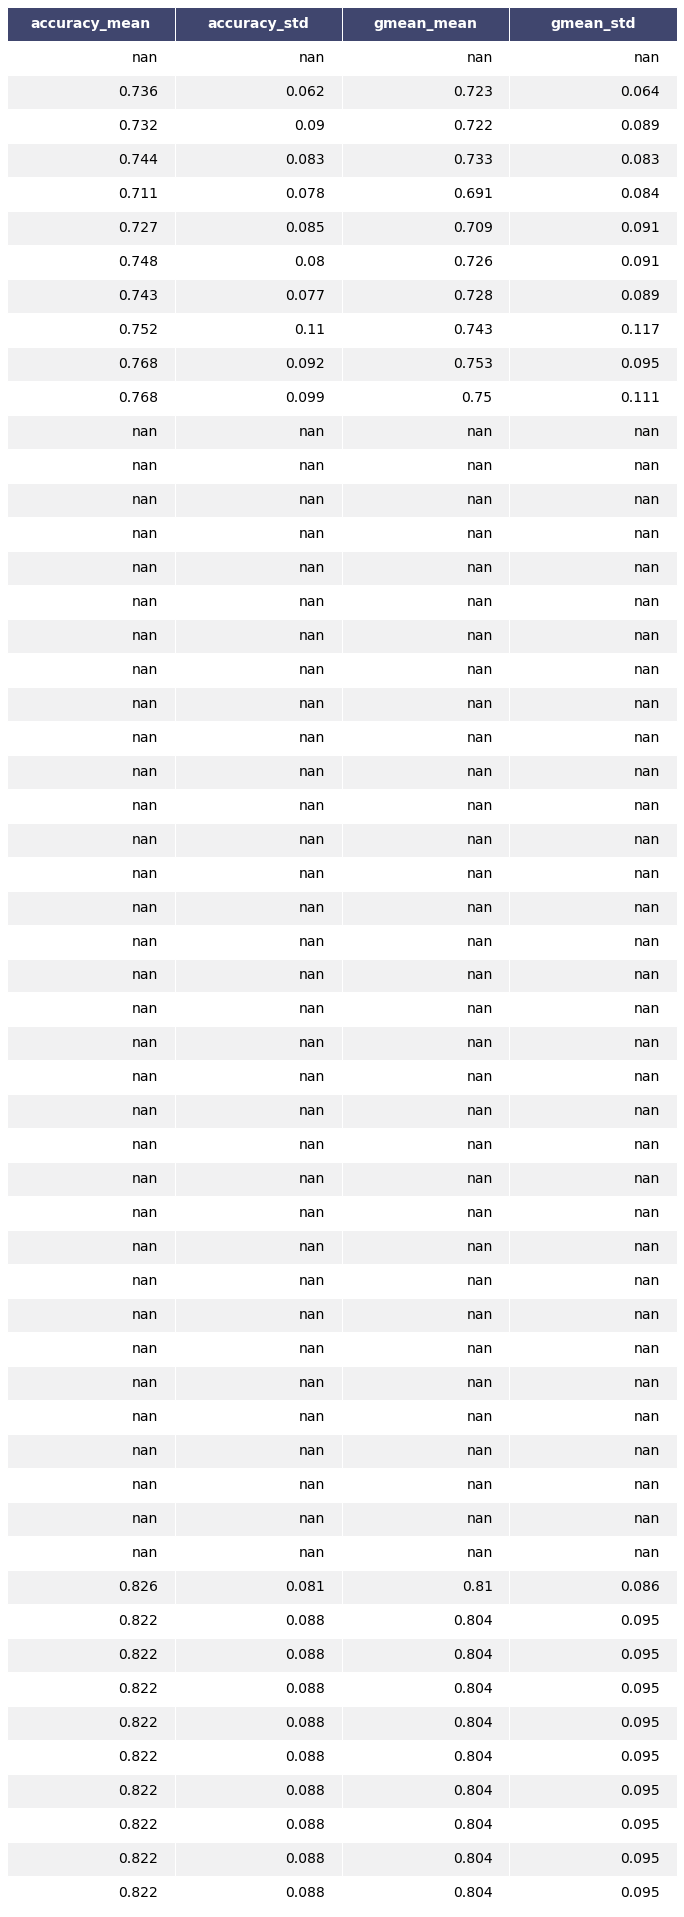

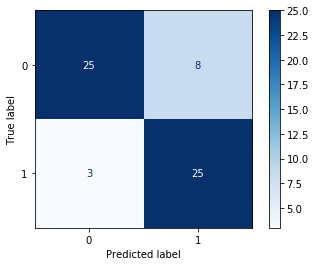

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'clf__base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'clf__n_estimators': 10}

Grid scores on development set:

0.8524590163934426


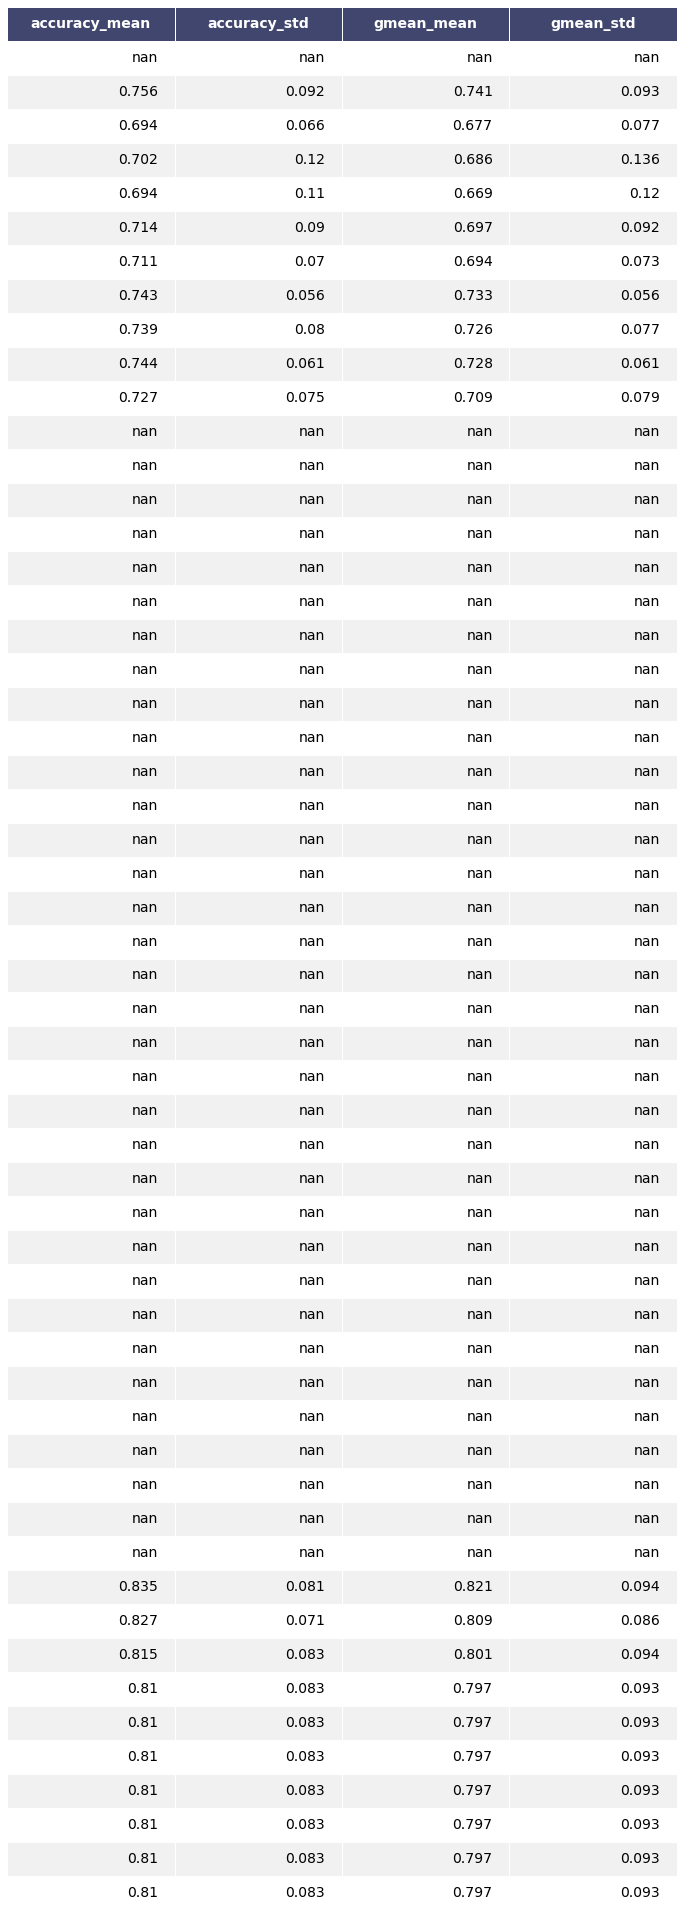

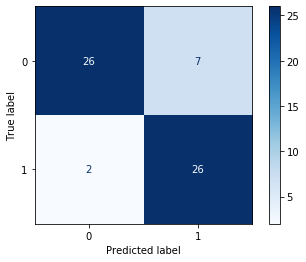

17.242992639541626


In [514]:
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import time
import pickle

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# import warnings
# warnings.filterwarnings('ignore')
from sklearn import metrics

classifier_name = 'AdaBoost'
start = time.time()
pipe = Pipeline(steps=[('scaler', StandardScaler()),('clf', AdaBoostClassifier())])

estimator_values = [
    DecisionTreeClassifier(max_depth=3, criterion='gini'),
    SVC(kernel='rbf',C=0.1),
    SVC(random_state=42),
    MLPClassifier(activation='tanh', hidden_layer_sizes=(20,10)),
    LogisticRegression()
]


n_estimators_values = list(range(0,110,10))
tuned_parameters = {'clf__base_estimator': estimator_values,
                   'clf__n_estimators': n_estimators_values}
refit = 'accuracy'

scoring = {'accuracy': 'accuracy',
#            'roc_auc': 'roc_auc',
          'gmean': make_scorer(gmean)}

data_sets = [ org_data,  new_data]
data_names = ['data', 'data_ohe']
for data_name, data in zip(data_names, data_sets):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

    result_list_of_dicts= []
    print("# Tuning hyper-parameters for %s" % 'accuracy')
    print()

    clf = GridSearchCV(estimator=pipe, 
                       param_grid=tuned_parameters, 
                       scoring=scoring,
                       refit=refit,
                       cv=StratifiedKFold(n_splits=10, shuffle=True),
                      return_train_score=True,
                      n_jobs=6)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(clf.cv_results_['params']):
        acc_mean = clf.cv_results_['mean_test_{0}'.format('accuracy')][i]
#         roc_auc_mean = clf.cv_results_['mean_test_{0}'.format('roc_auc')][i]
        gmean_mean = clf.cv_results_['mean_test_{0}'.format('gmean')][i]

        acc_std = clf.cv_results_['std_test_{0}'.format('accuracy')][i]
#         roc_auc_std = clf.cv_results_['std_test_{0}'.format('roc_auc')][i]
        gmean_std = clf.cv_results_['std_test_{0}'.format('gmean')][i]

#         print(params)
#         print('accuracy: %0.3f (+/-%0.03f)' %(acc_mean, acc_std))
#         print('roc_auc: %0.3f (+/-%0.03f)' %(roc_auc_mean, roc_auc_std))
#         print('gmean: %0.3f (+/-%0.03f)' %(gmean_mean, gmean_std))
#         print()
        result_list_of_dicts.append({
                                    'accuracy_mean':acc_mean,
                                    'accuracy_std':acc_std,
#                                     'roc_auc_mean':roc_auc_mean,
#                                     'roc_auc_std':roc_auc_std,
                                    'gmean_mean':gmean_mean,
                                    'gmean_std':gmean_std})

#     print()
    pickle.dump(clf, open( "./saved_models/{0}_{1}.pkl".format(classifier_name, data_name), "wb" ) )
    result = pd.DataFrame(result_list_of_dicts).round(3)
    render_mpl_table(result)
    plt.savefig("./figures/results_{0}_{1}.pdf".format(classifier_name, data_name), bbox_inches='tight')
    
#     # create heatmap
#     print(result['accuracy_mean'].to_numpy())
#     values = result['accuracy_mean'].to_numpy().reshape(len(estimator_values), len(n_estimators_values)).T
#     x = result.iloc[:,0].unique()
#     y = result.iloc[:,1].unique()
#     create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}.pdf'.format(classifier_name, data_name))
        
    best_est = clf.best_estimator_
    best_est.fit(X_train, y_train)
    y_pred = best_est.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print(score)
    
    disp = plot_confusion_matrix(best_est, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
    plt.savefig('./figures/AdaBoost_{0}_CM.pdf'.format(data_name))
    plt.show()
print(time.time()-start)


# StackingClassifier

# Tuning hyper-parameters for accuracy



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

Best parameters set found on development set:

{'clf__estimators': [('DTC', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')), ('SVC', SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)), ('MLP', MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learn

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

test BEST:  0.8524590163934426
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 StackingClassifier(cv=None,
                                    estimators=[('DTC',
                                                 DecisionTreeClassifier(ccp_alpha=0.0,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                        max_depth=3,
                                                                        max_features=None,
                                                                        max_leaf_nodes=None,
                                                                        min_impurity_decrease=0.0,
                                                                        min_impurit

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


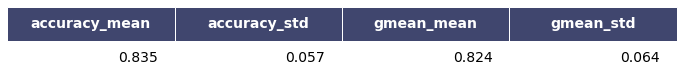

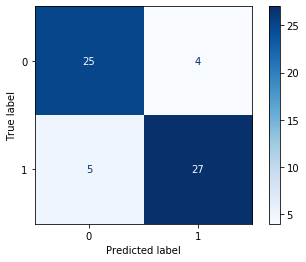

# Tuning hyper-parameters for accuracy



D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\sit

Best parameters set found on development set:

{'clf__estimators': [('DTC', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')), ('SVC', SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)), ('MLP', MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learn

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\sit

test BEST:  0.8688524590163934
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 StackingClassifier(cv=None,
                                    estimators=[('DTC',
                                                 DecisionTreeClassifier(ccp_alpha=0.0,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                        max_depth=3,
                                                                        max_features=None,
                                                                        max_leaf_nodes=None,
                                                                        min_impurity_decrease=0.0,
                                                                        min_impurit

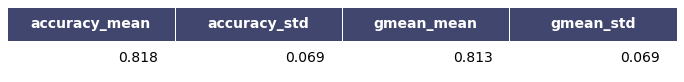

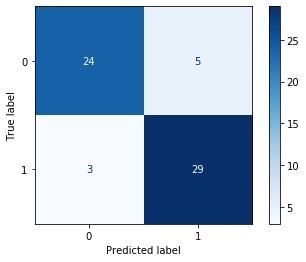

8.50787353515625


In [521]:
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import time
import pickle
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

# import warnings
# warnings.filterwarnings('ignore')


classifier_name = 'RFC'
start = time.time()

estimator_values = [('DTC',DecisionTreeClassifier(max_depth=3, criterion='gini')),
                    ('SVC',SVC(kernel='rbf',C=10)),
                    ('MLP',MLPClassifier(activation='tanh', hidden_layer_sizes=(20,10), solver='adam')),
                    ('LR',LogisticRegression()),
                   ('QDA', QuadraticDiscriminantAnalysis())]
pipe = Pipeline(steps=[('scaler', StandardScaler()),('clf', StackingClassifier(estimators=[]))])
tuned_parameters = {'clf__estimators': [estimator_values]}
# tuned_parameters = {}
refit = 'accuracy'

scoring = {'accuracy': 'accuracy',
#            'roc_auc': 'roc_auc',
          'gmean': make_scorer(gmean)}

data_sets = [ org_data,  new_data]
data_names = ['data', 'data_ohe']
for data_name, data in zip(data_names, data_sets):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    result_list_of_dicts= []
    print("# Tuning hyper-parameters for %s" % 'accuracy')
    print()

    clf = GridSearchCV(estimator=pipe, 
                       param_grid=tuned_parameters, 
                       scoring=scoring,
                       refit=refit,
                       cv=StratifiedKFold(n_splits=10, shuffle=True),
                      return_train_score=True,
                      n_jobs=6)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(clf.cv_results_['params']):
        acc_mean = clf.cv_results_['mean_test_{0}'.format('accuracy')][i]
#         roc_auc_mean = clf.cv_results_['mean_test_{0}'.format('roc_auc')][i]
        gmean_mean = clf.cv_results_['mean_test_{0}'.format('gmean')][i]

        acc_std = clf.cv_results_['std_test_{0}'.format('accuracy')][i]
#         roc_auc_std = clf.cv_results_['std_test_{0}'.format('roc_auc')][i]
        gmean_std = clf.cv_results_['std_test_{0}'.format('gmean')][i]

#         print(params)
#         print('accuracy: %0.3f (+/-%0.03f)' %(acc_mean, acc_std))
#         print('roc_auc: %0.3f (+/-%0.03f)' %(roc_auc_mean, roc_auc_std))
#         print('gmean: %0.3f (+/-%0.03f)' %(gmean_mean, gmean_std))
#         print()
        result_list_of_dicts.append({
                                    'accuracy_mean':acc_mean,
                                    'accuracy_std':acc_std,
#                                     'roc_auc_mean':roc_auc_mean,
#                                     'roc_auc_std':roc_auc_std,
                                    'gmean_mean':gmean_mean,
                                    'gmean_std':gmean_std})

#     print()
    pickle.dump(clf, open( "./saved_models/{0}_{1}.pkl".format(classifier_name, data_name), "wb" ) )
    result = pd.DataFrame(result_list_of_dicts).round(3)
    render_mpl_table(result)
    plt.savefig("./figures/results_{0}_{1}.pdf".format(classifier_name, data_name), bbox_inches='tight')
    
    best_est = clf.best_estimator_
    best_est.fit(X_train, y_train)
    y_pred = best_est.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("test BEST: ", score)
    print(best_est)
    
    disp = plot_confusion_matrix(best_est, X_test, y_test,
                                 display_labels=[0, 1],
                                 cmap=plt.cm.Blues, 
                                 values_format='d')
    plt.savefig('./figures/ST_{0}_CM.pdf'.format(data_name))
    plt.show()

#     # create heatmap
#     values = result['accuracy_mean'].to_numpy().reshape(len(C_values), len(solver_values)).T
#     x = result.iloc[:,0].unique()
#     y = result.iloc[:,1].unique()
#     create_heatmap(values, x, y, result.columns[0], result.columns[1], '', 'heatmap_{0}_{1}.pdf'.format(classifier_name, data_name))

print(time.time()-start)
